# Surface concentrations

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt

%matplotlib notebook

Load domain mask etc.

In [3]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

In [4]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [5]:
ref   = nc.Dataset('/data/brogalla/run_storage/spin-up0-low-case/ANHA12_EXH006_2002_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [10]:
S_file  = nc.Dataset('/data/brogalla/ANHA12/ANHA12_EXH006_gridT_200201.nc')
S_model = np.array(S_file.variables['vosaline'])

Load Mn model results

In [11]:
folder = '/data/brogalla/run_storage/spin-up0-resus-deep2/'
file   = 'ANHA12_EXH006_2002_monthly.nc'

In [12]:
results  = nc.Dataset(folder+file)
dissolmn = np.array(results.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units

In [8]:
print('Max: ', np.amax(dissolmn))
print('Min: ', np.amin(dissolmn))
print('Ave: ', np.average(dissolmn))

Max:  261.52363830078684
Min:  -0.0105472514402849
Ave:  0.6158084497031482


In [14]:
S_model.shape

(1, 50, 2400, 1632)

Surface maps:

<IPython.core.display.Javascript object>


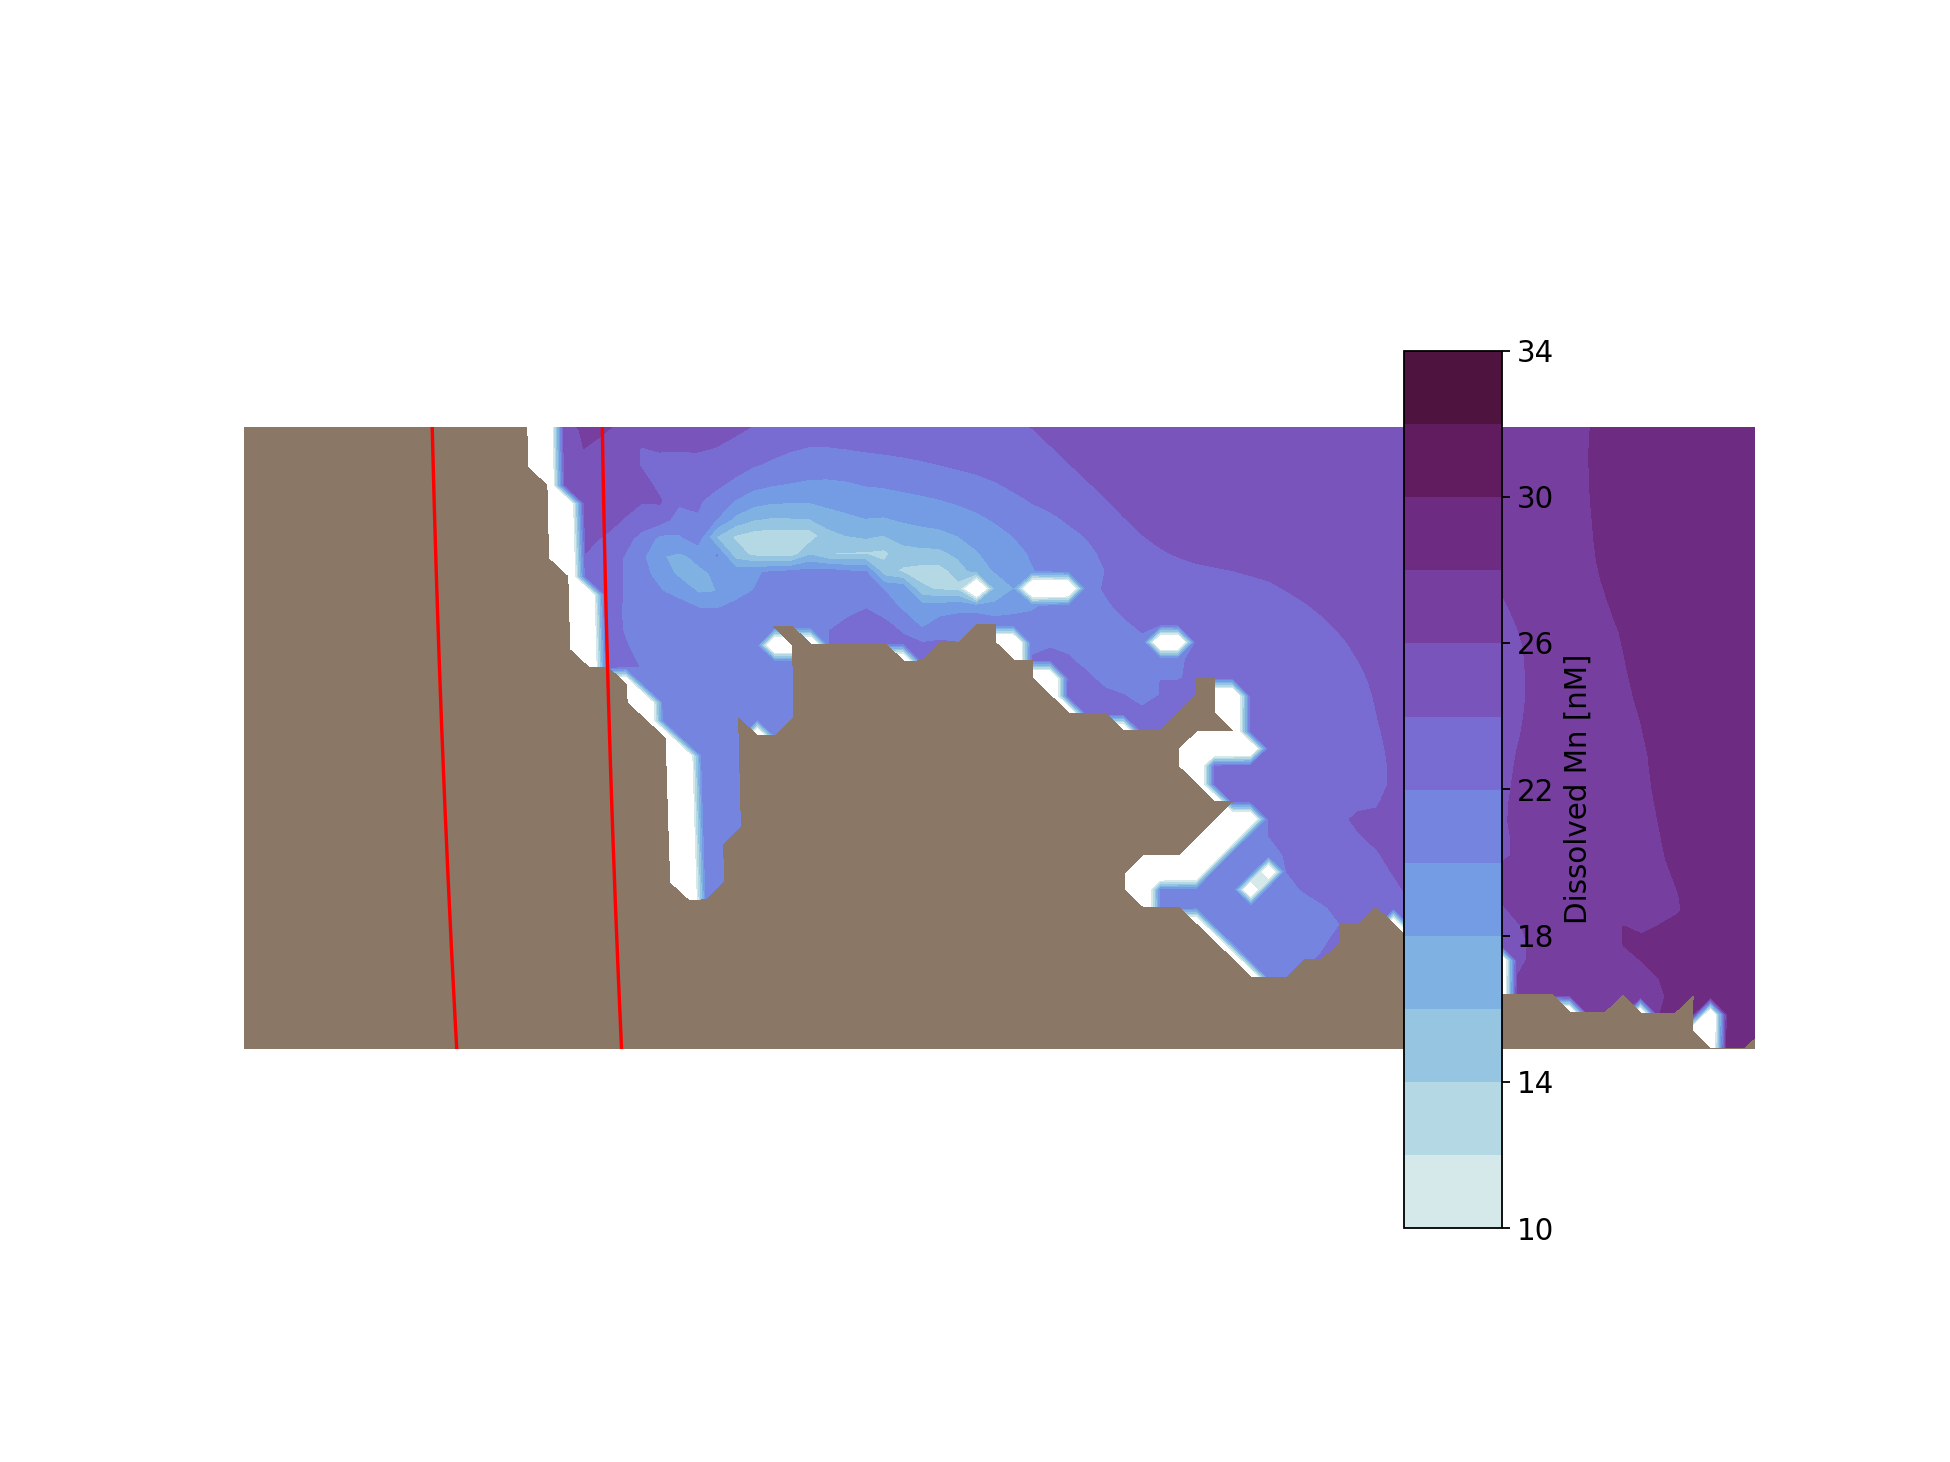

In [22]:
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 10
vmaxmn = 35

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, S_model[0,layer,imin:imax,jmin:jmax], \
                         np.arange(vminmn,vmaxmn+1,2),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

proj1.plot(x[-1,:],y[-1,:], '-r')
proj1.plot(x[-10,:],y[-10,:], '-r')

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


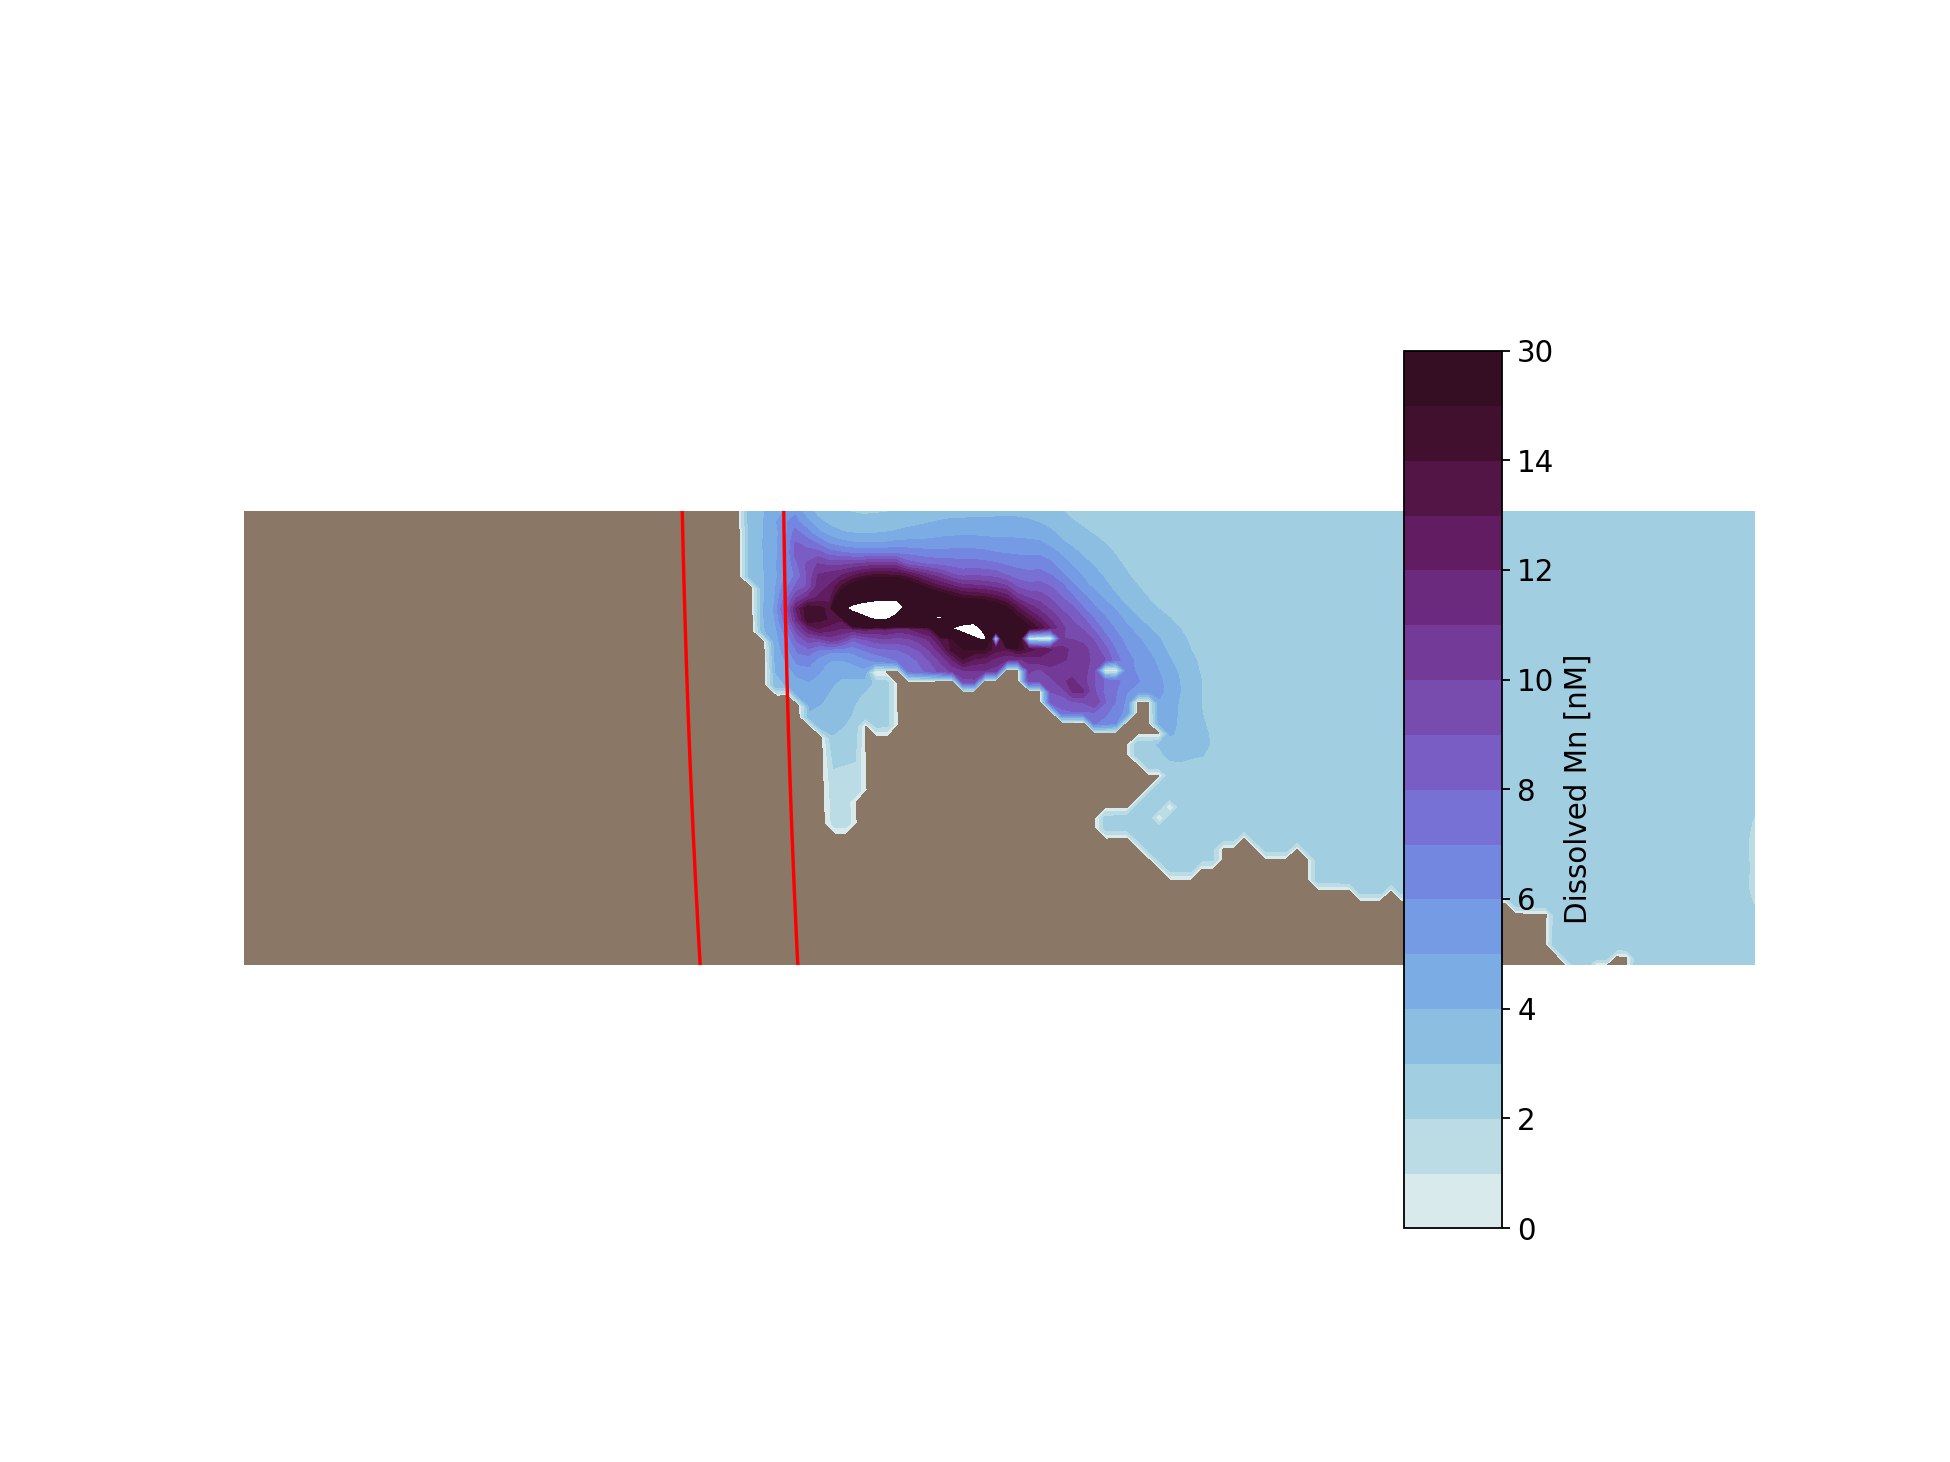

In [93]:
month=1
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),30),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

proj1.plot(x[-1,:],y[-1,:], '-r')
proj1.plot(x[-10,:],y[-10,:], '-r')

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


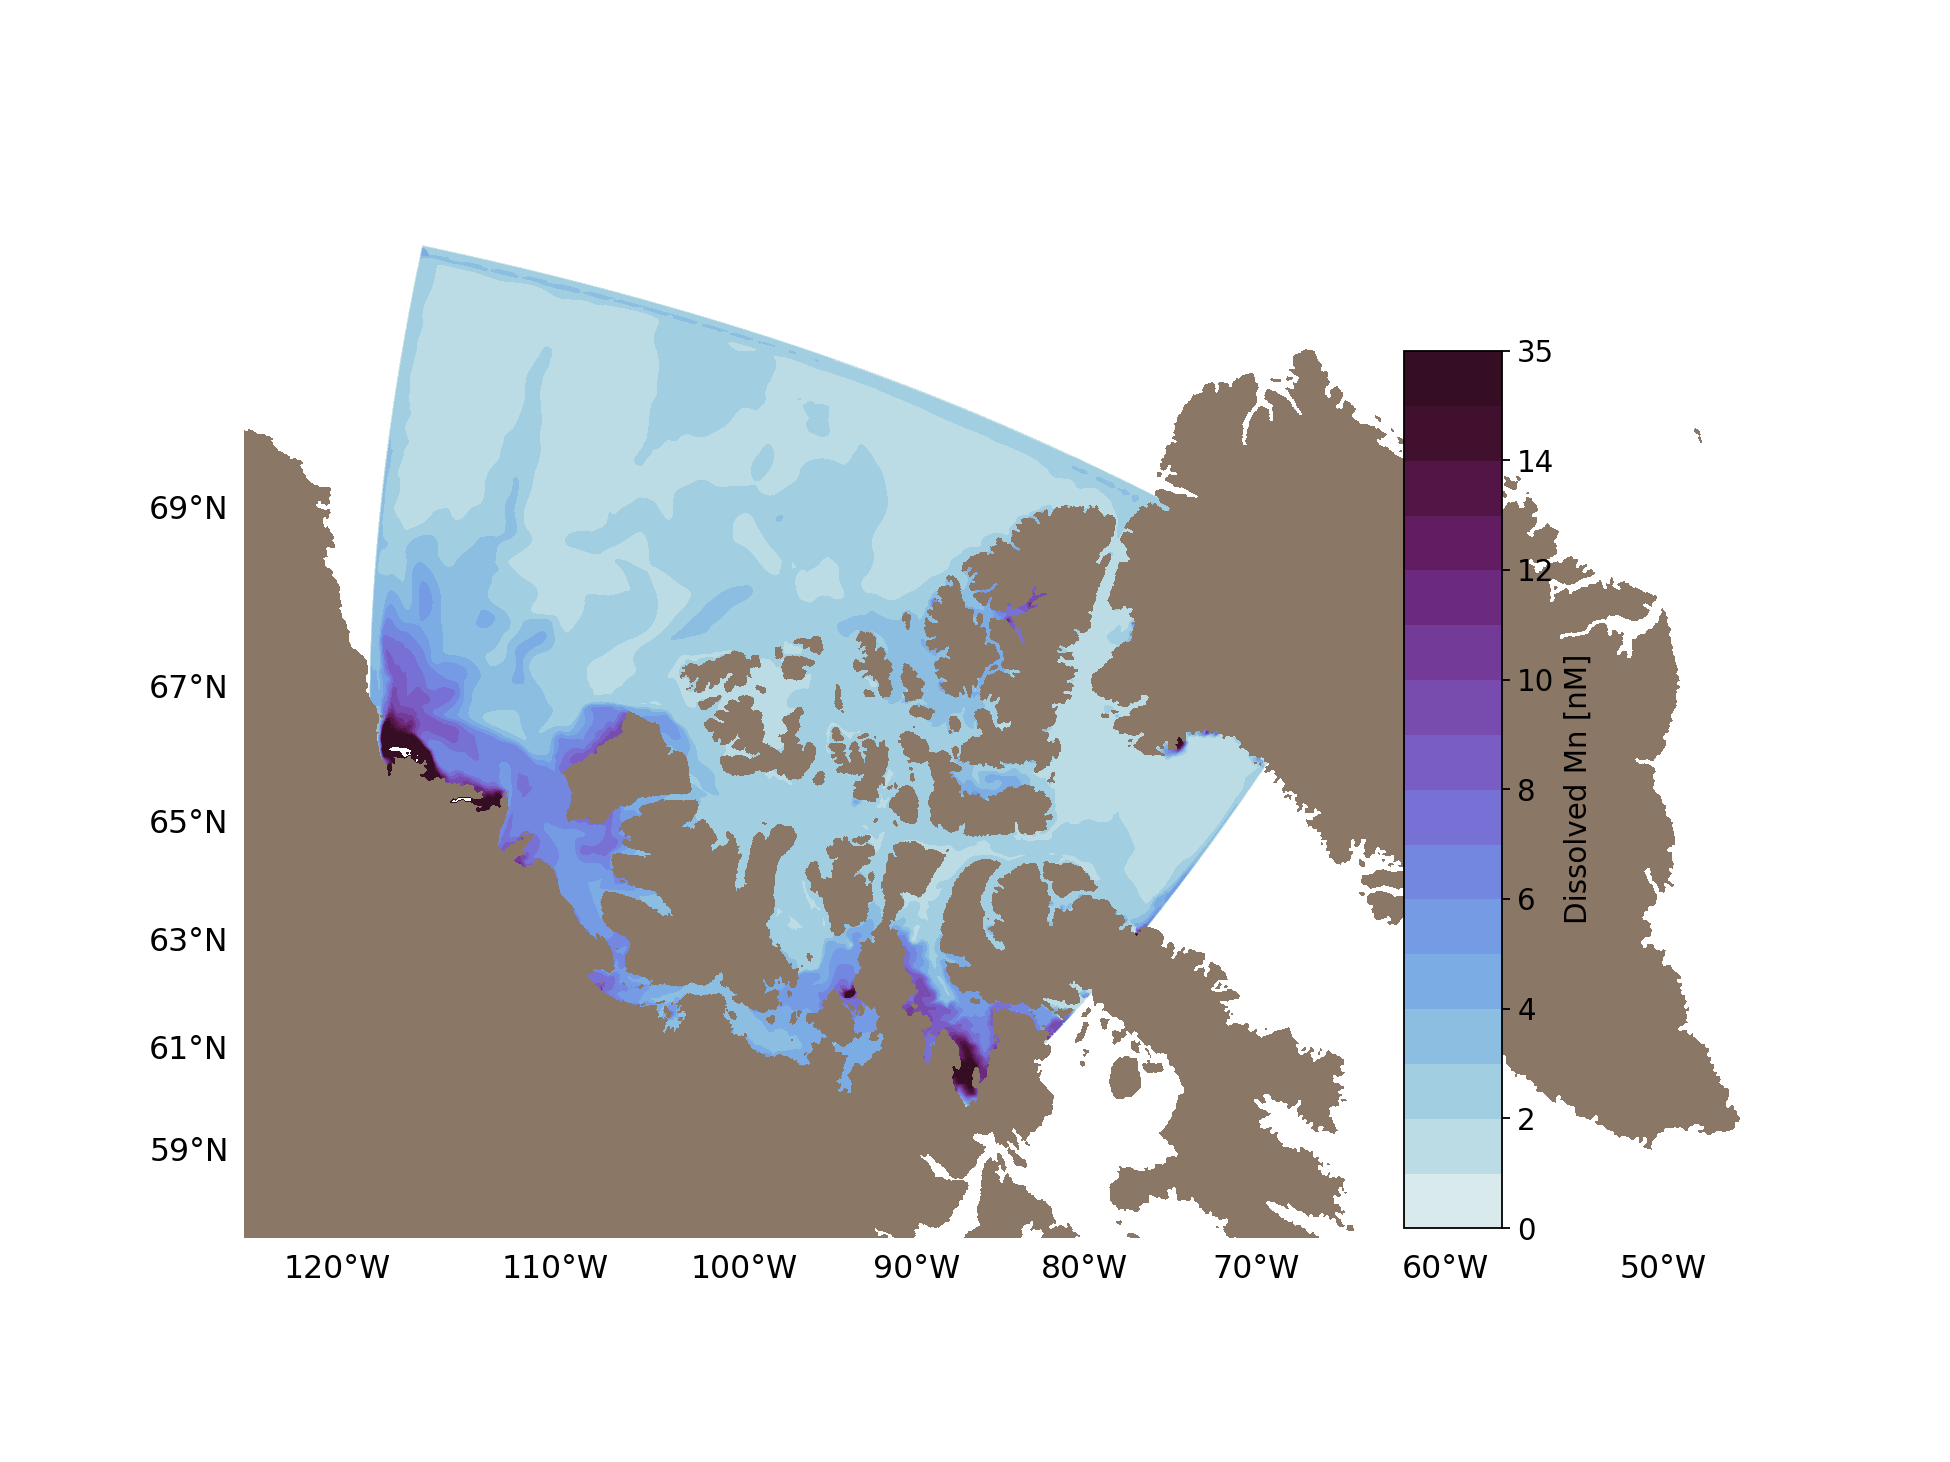

In [50]:
month=1
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


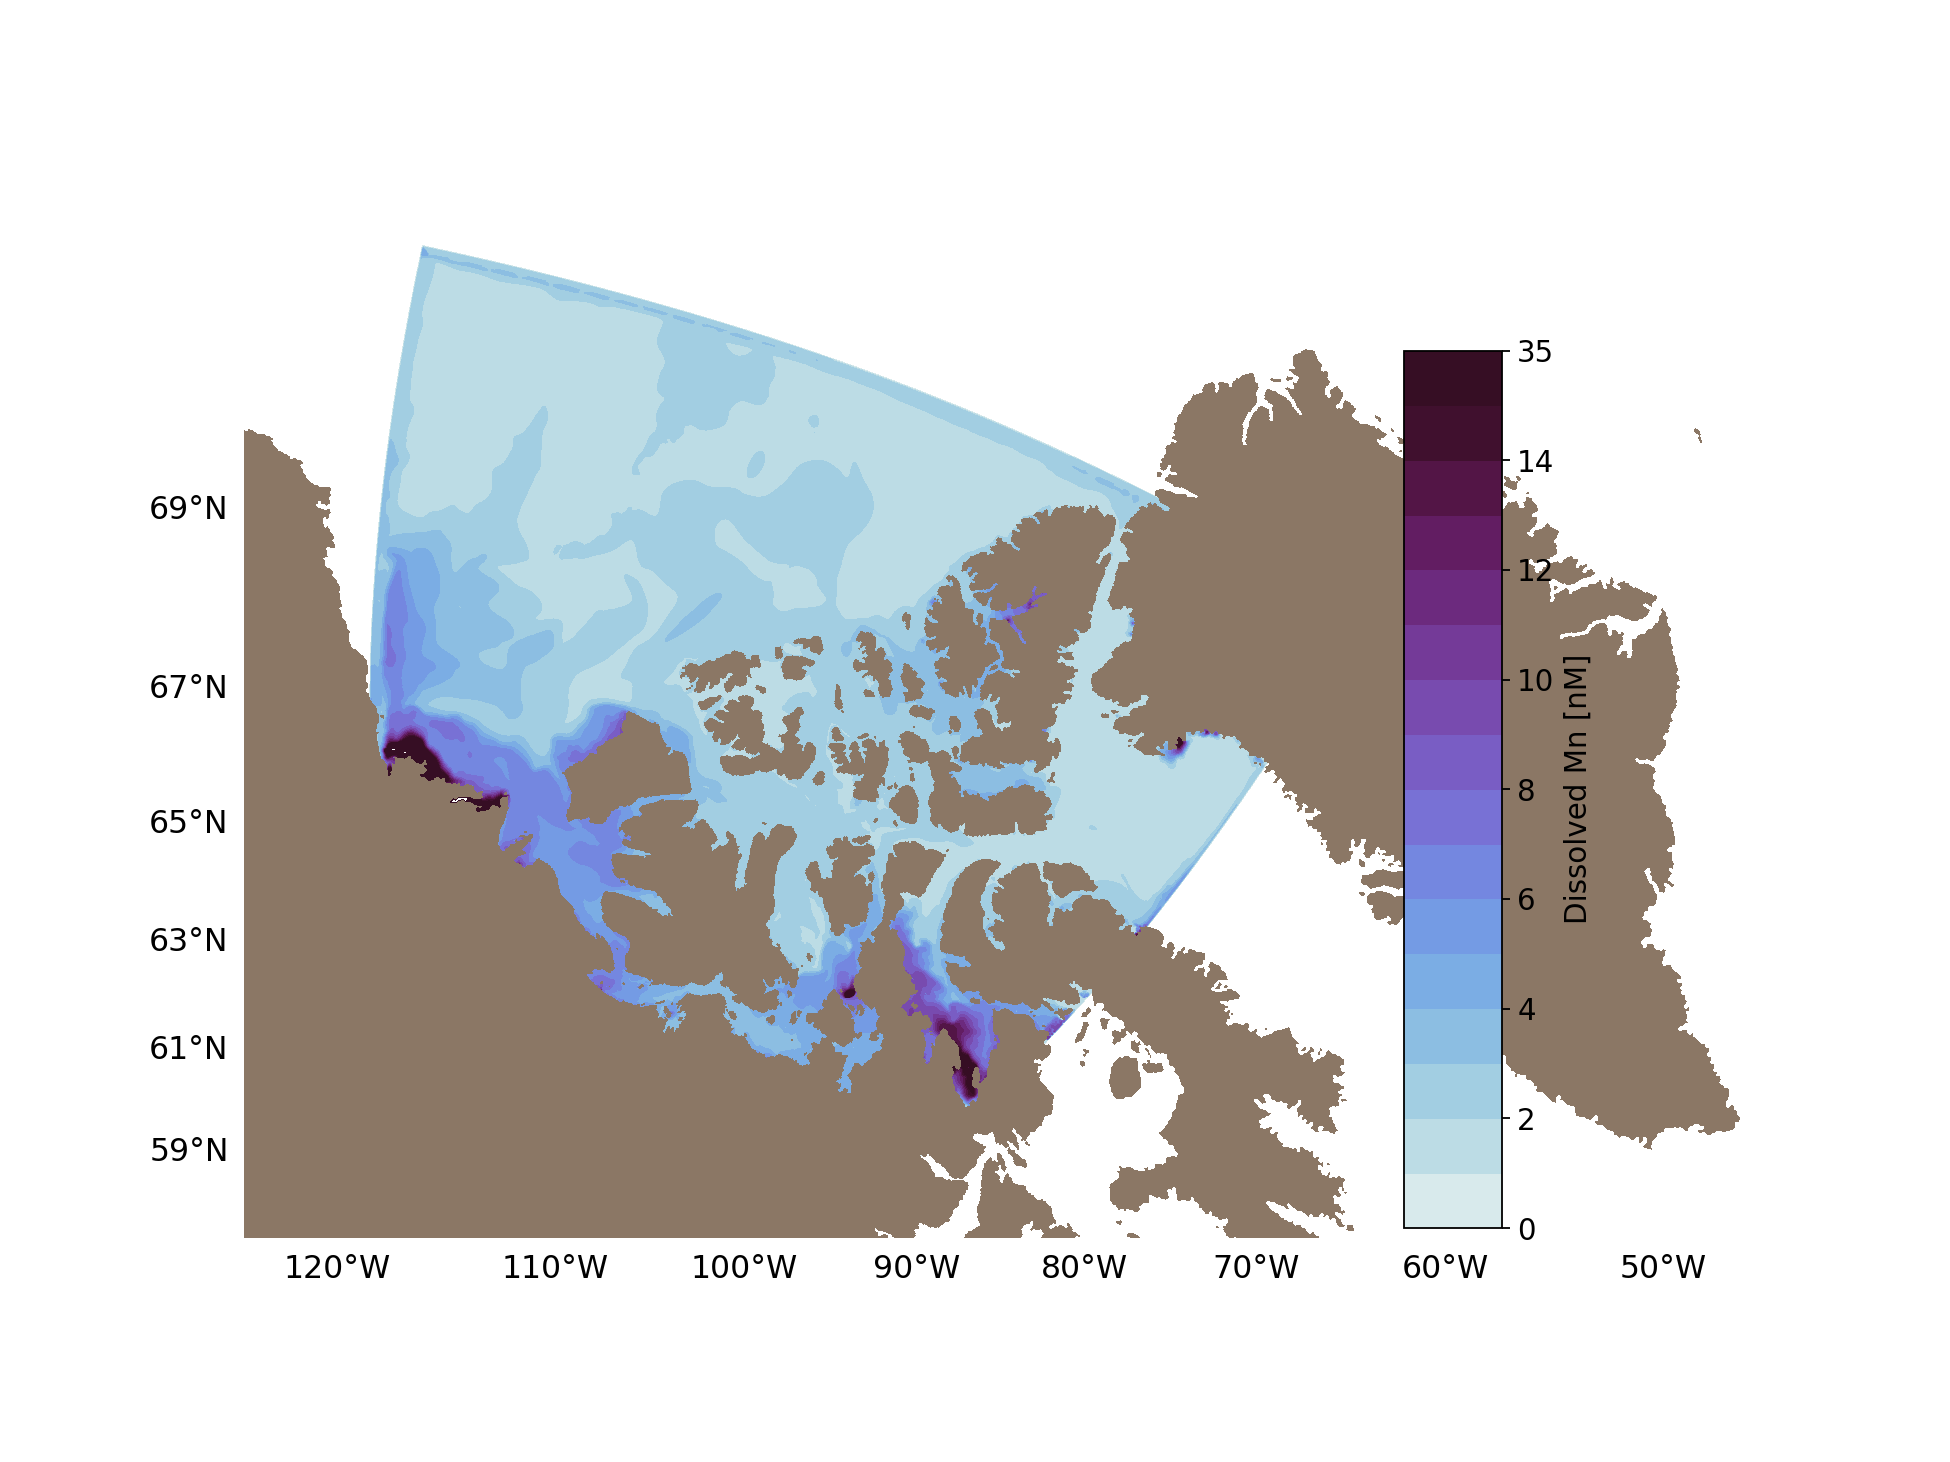

In [49]:
month=2
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


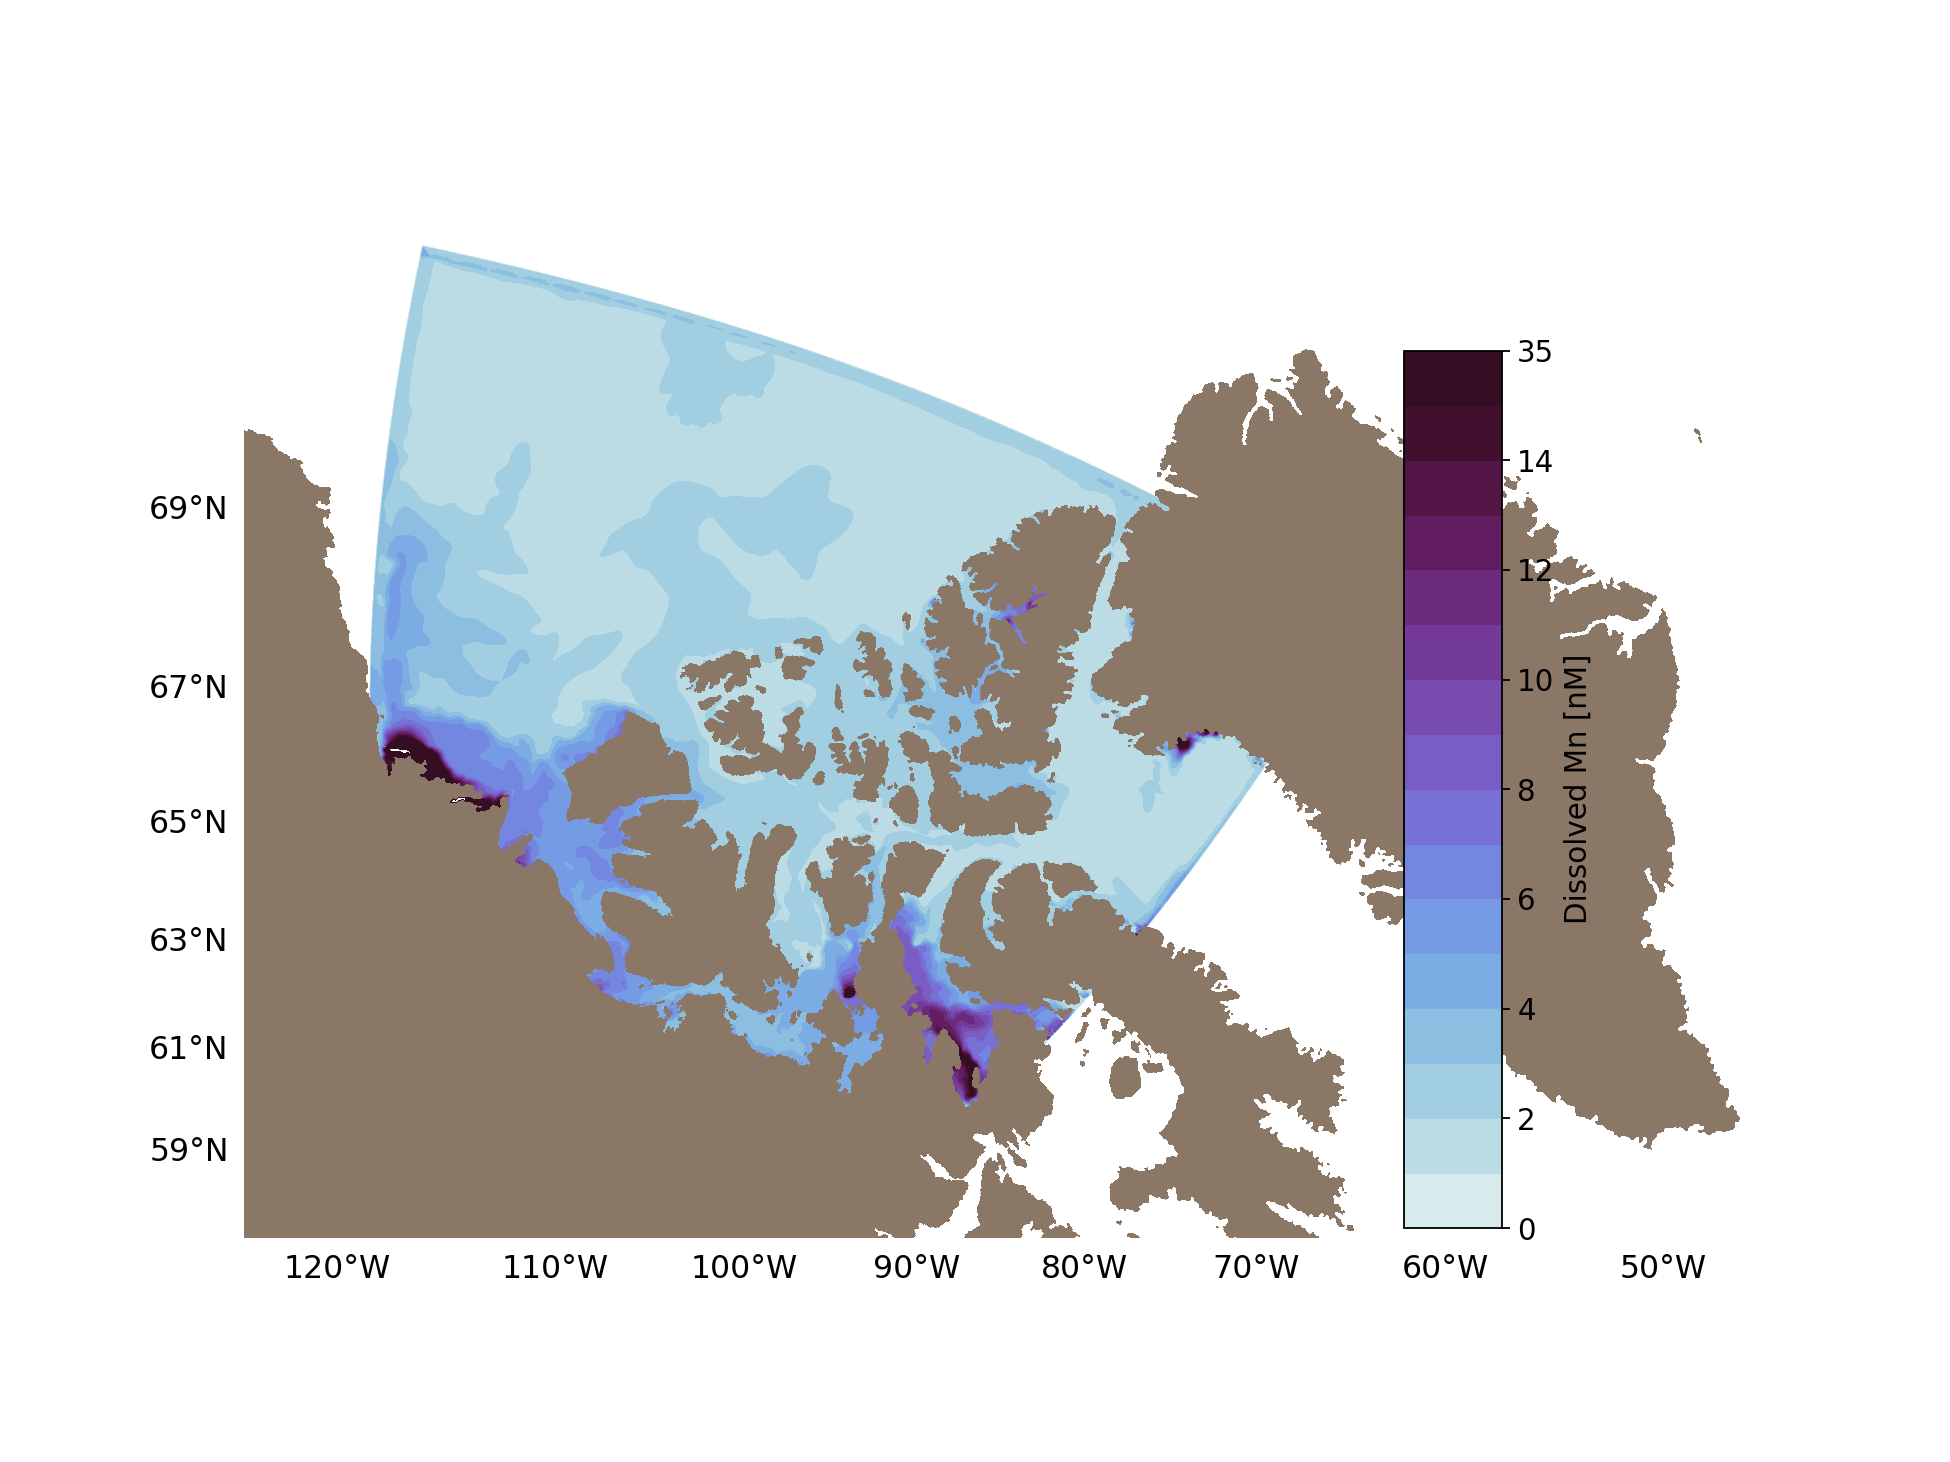

In [48]:
month=3
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


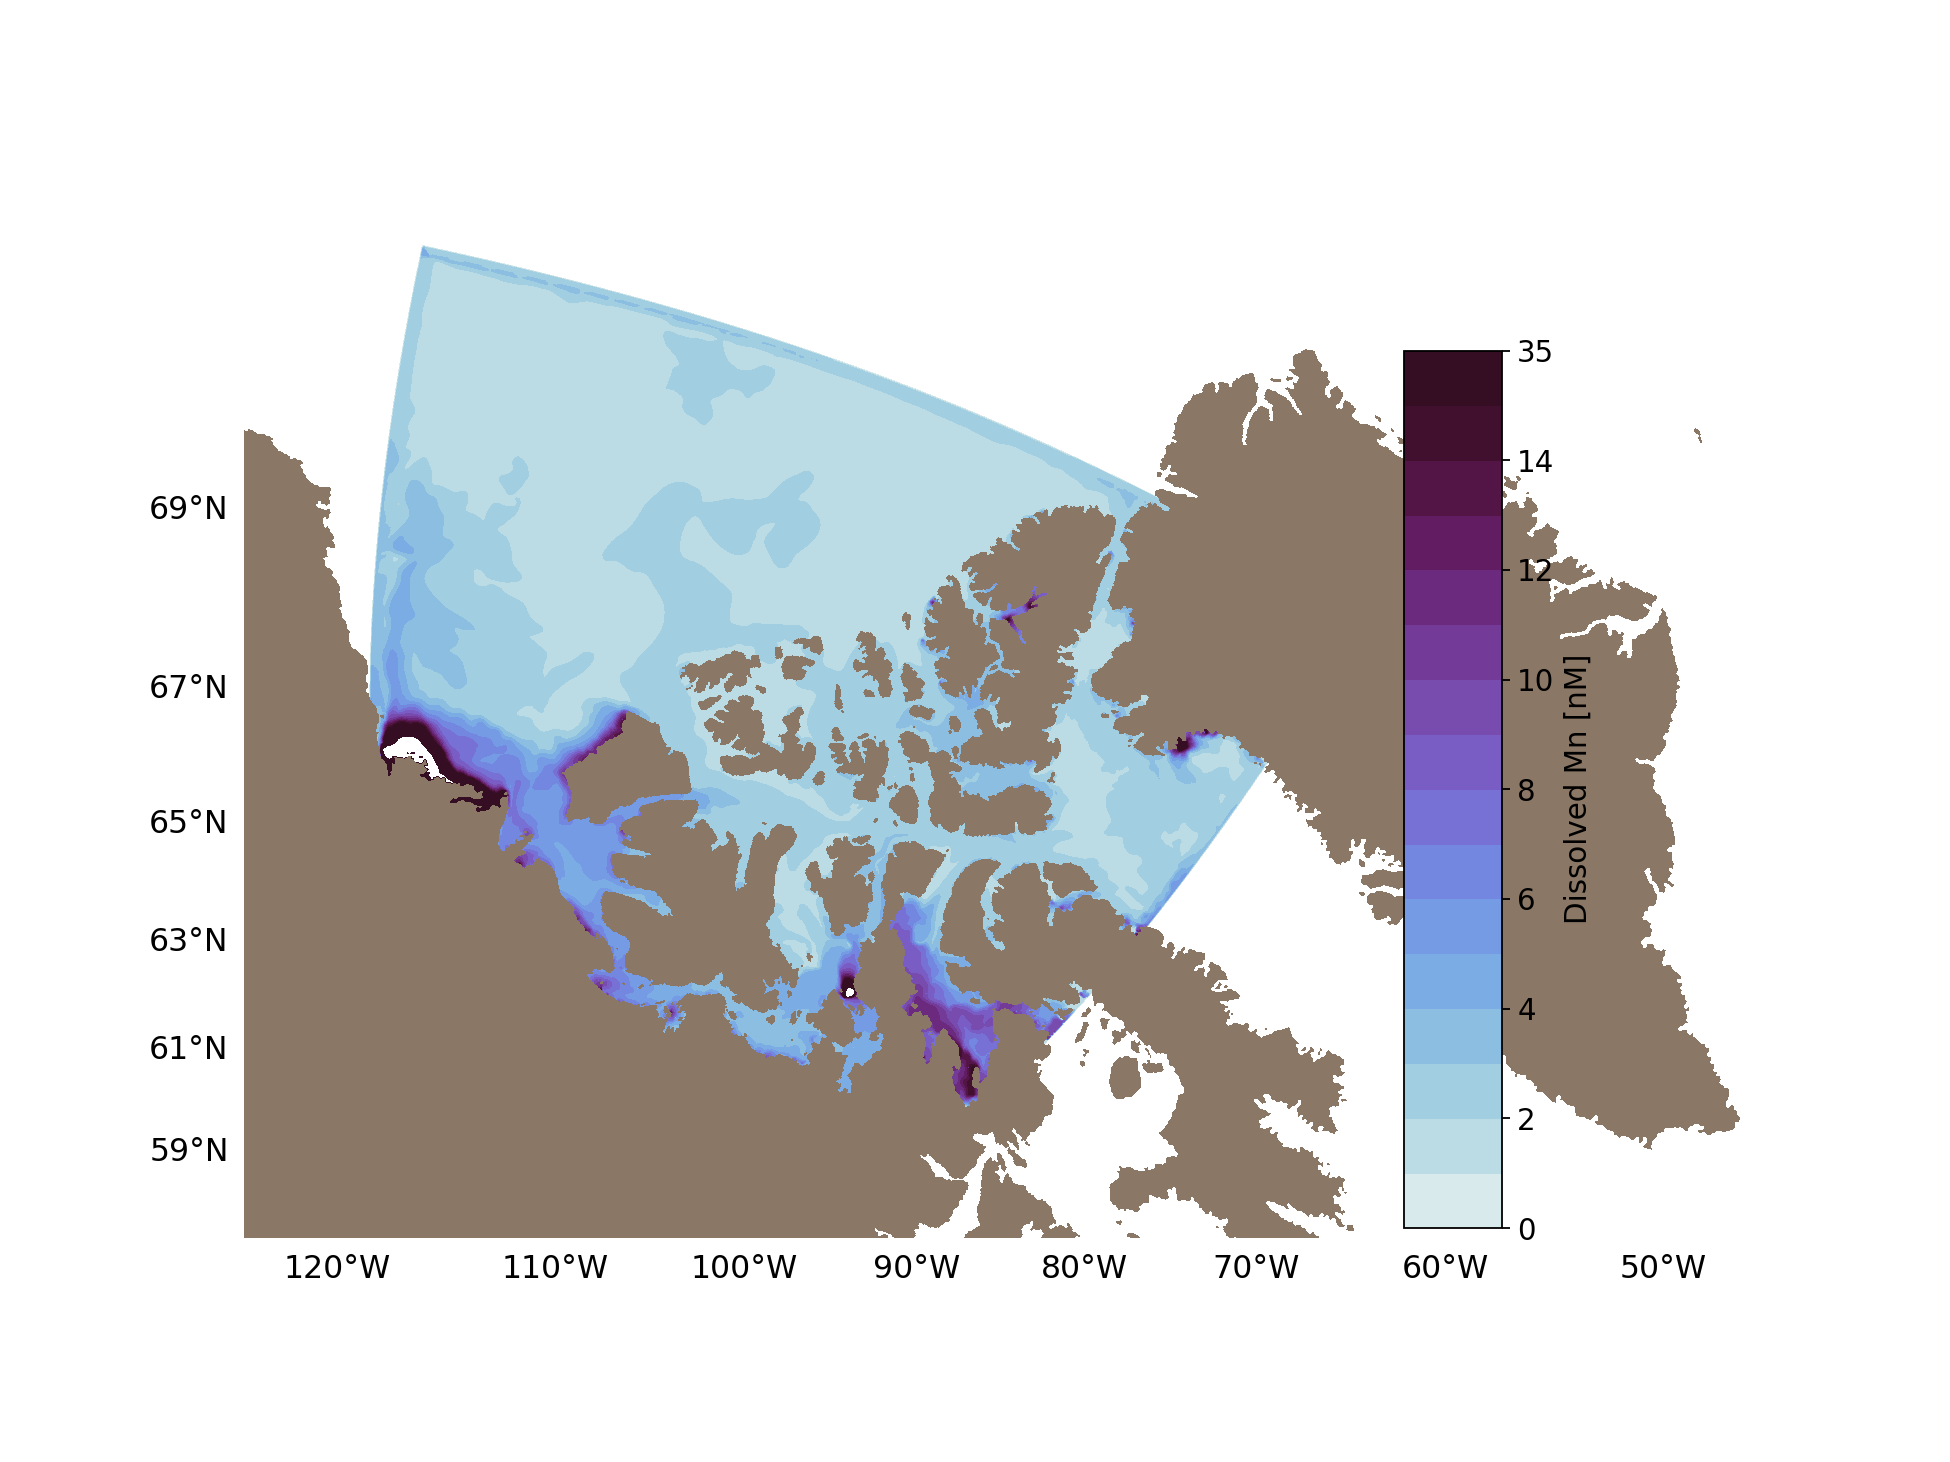

In [47]:
month=4
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


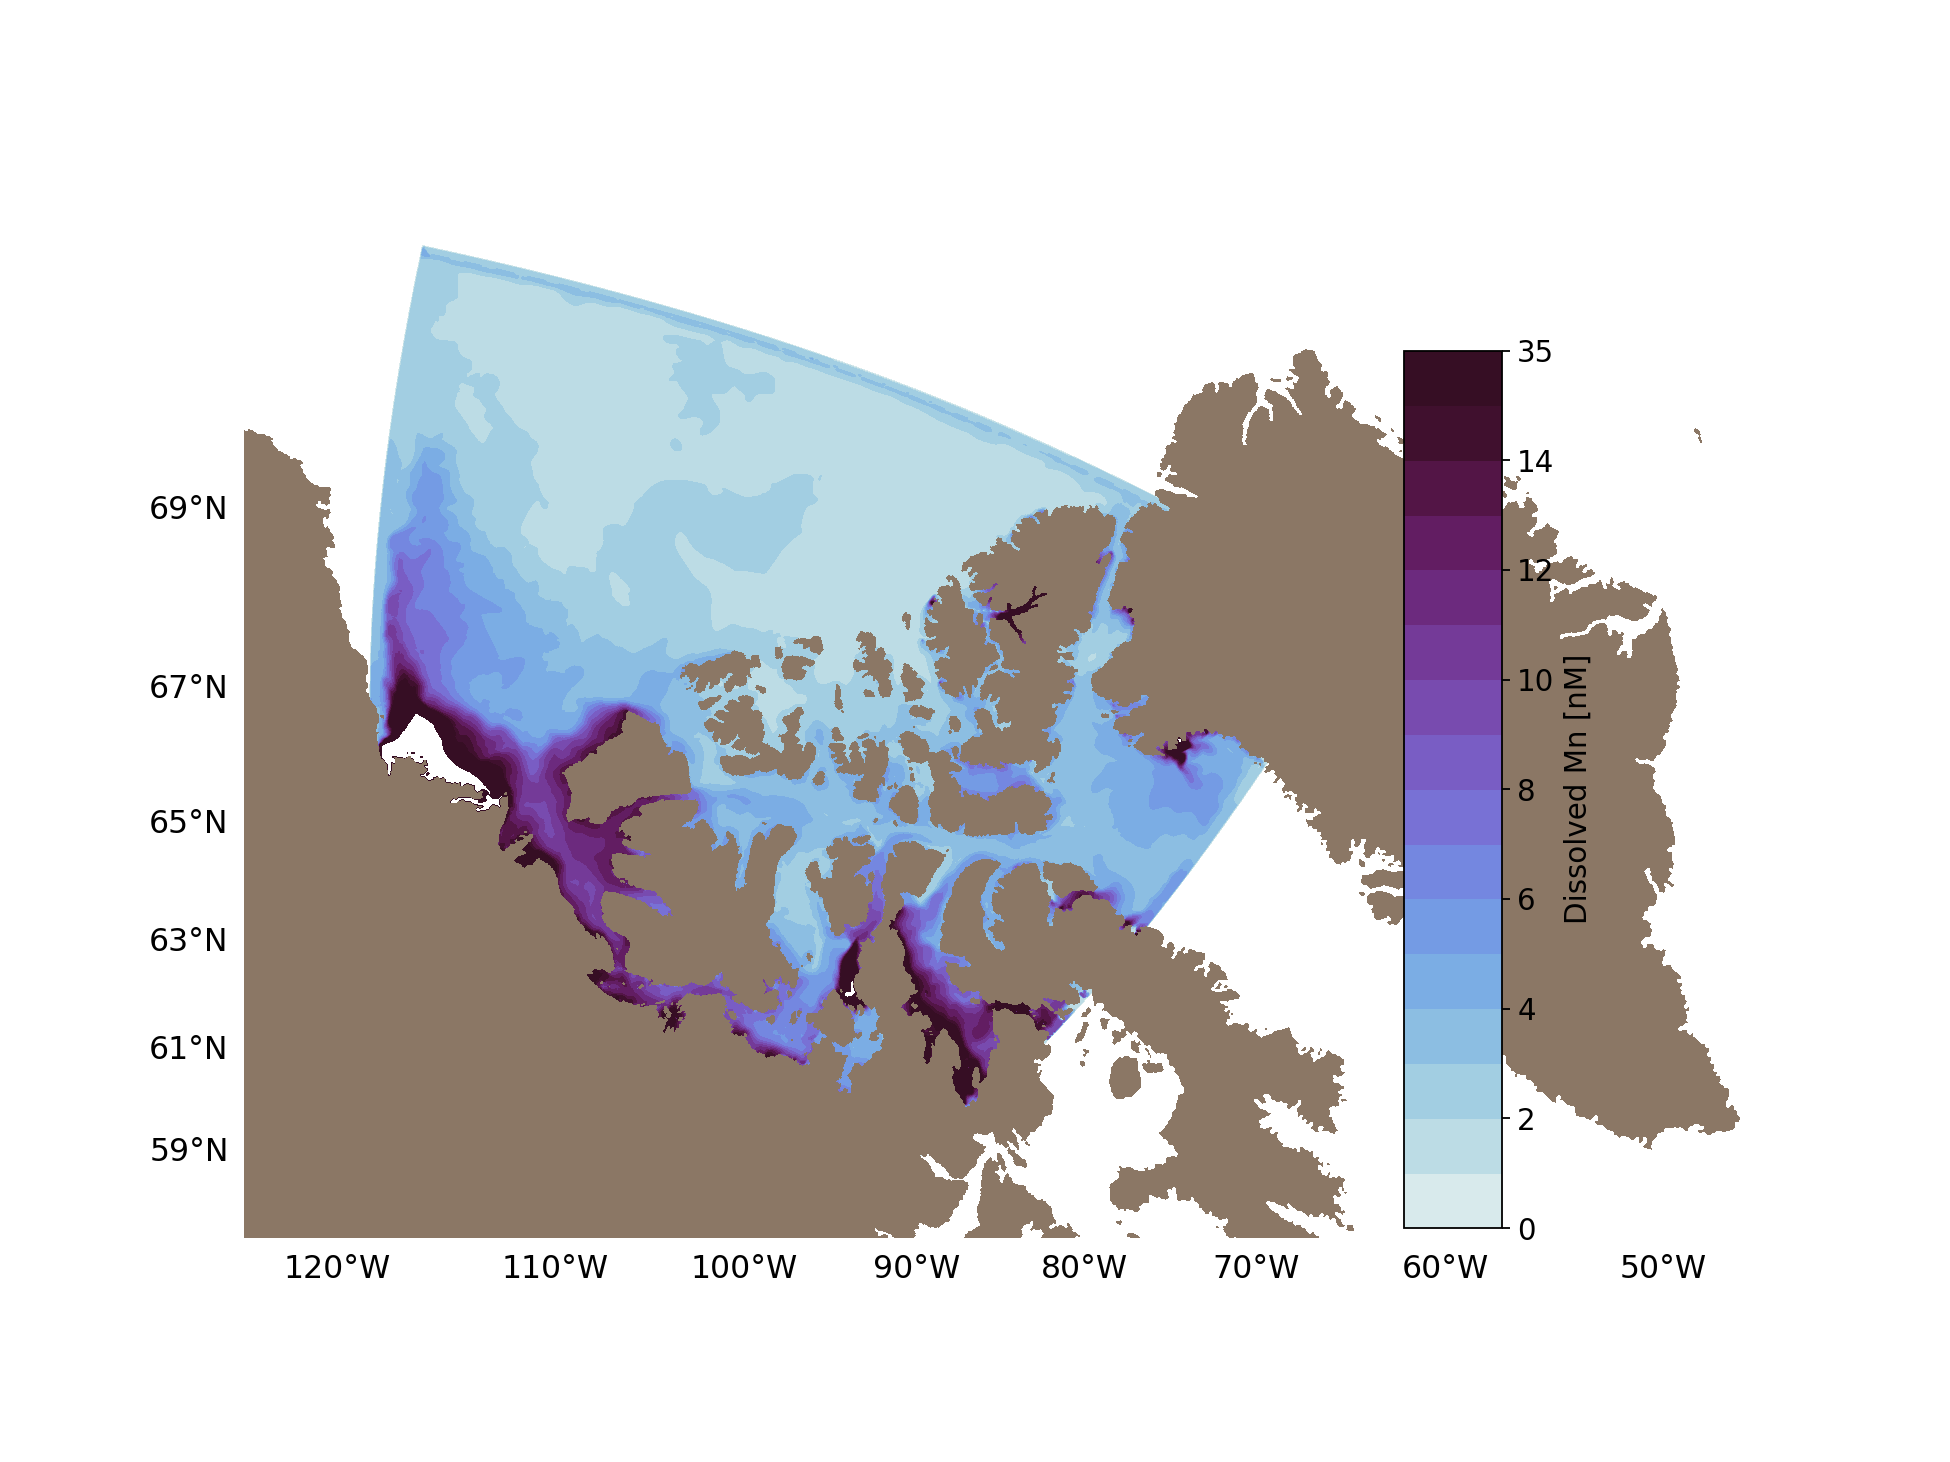

In [46]:
month=5
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


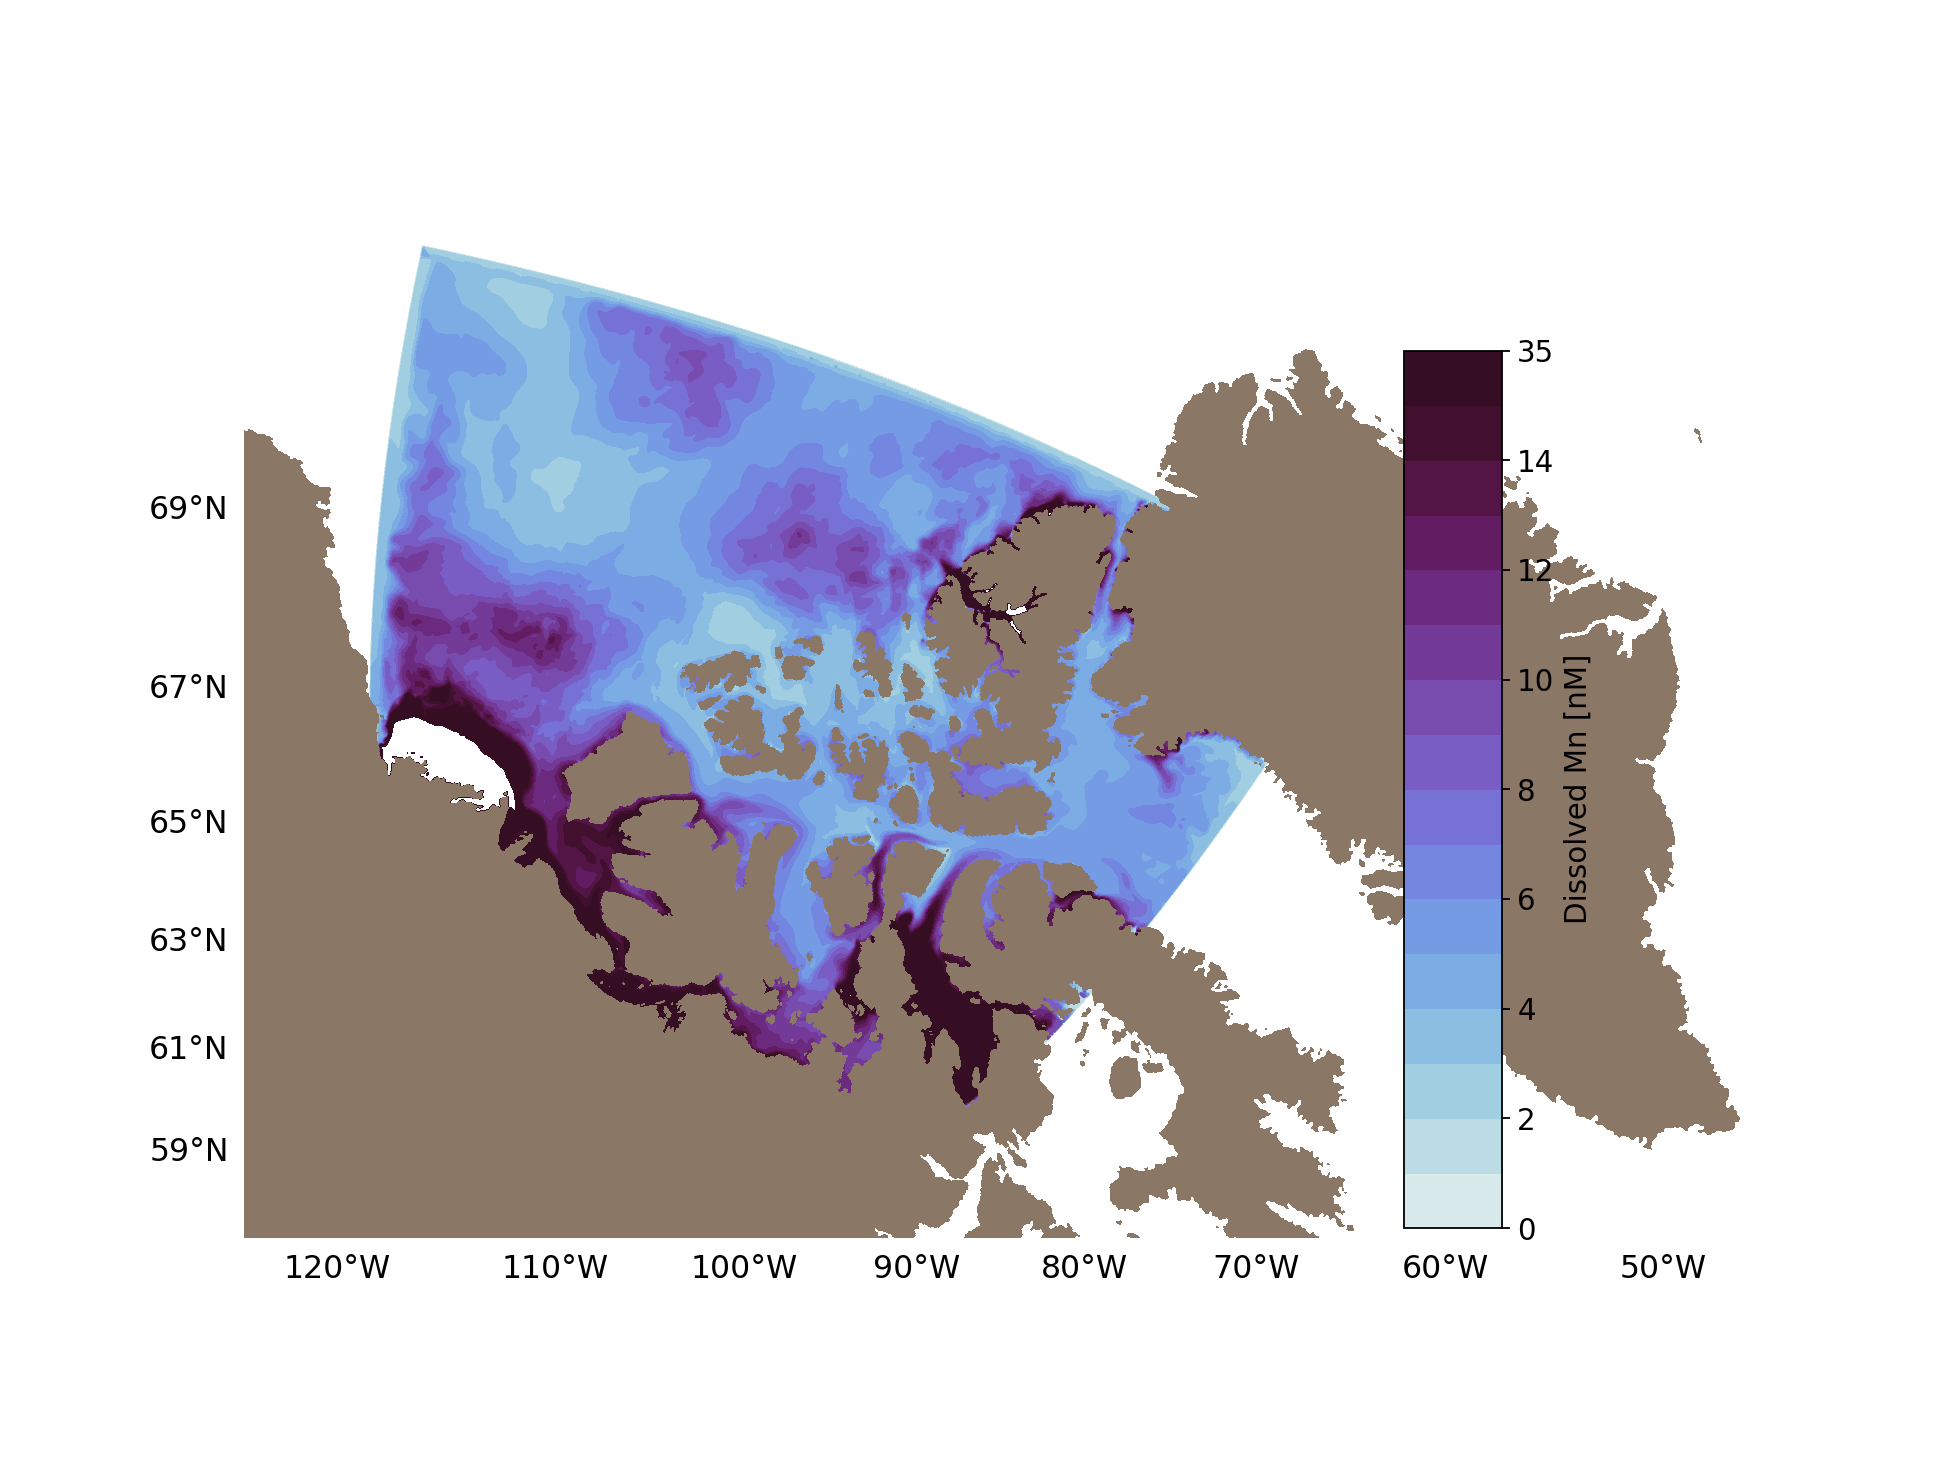

In [45]:
month=6
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


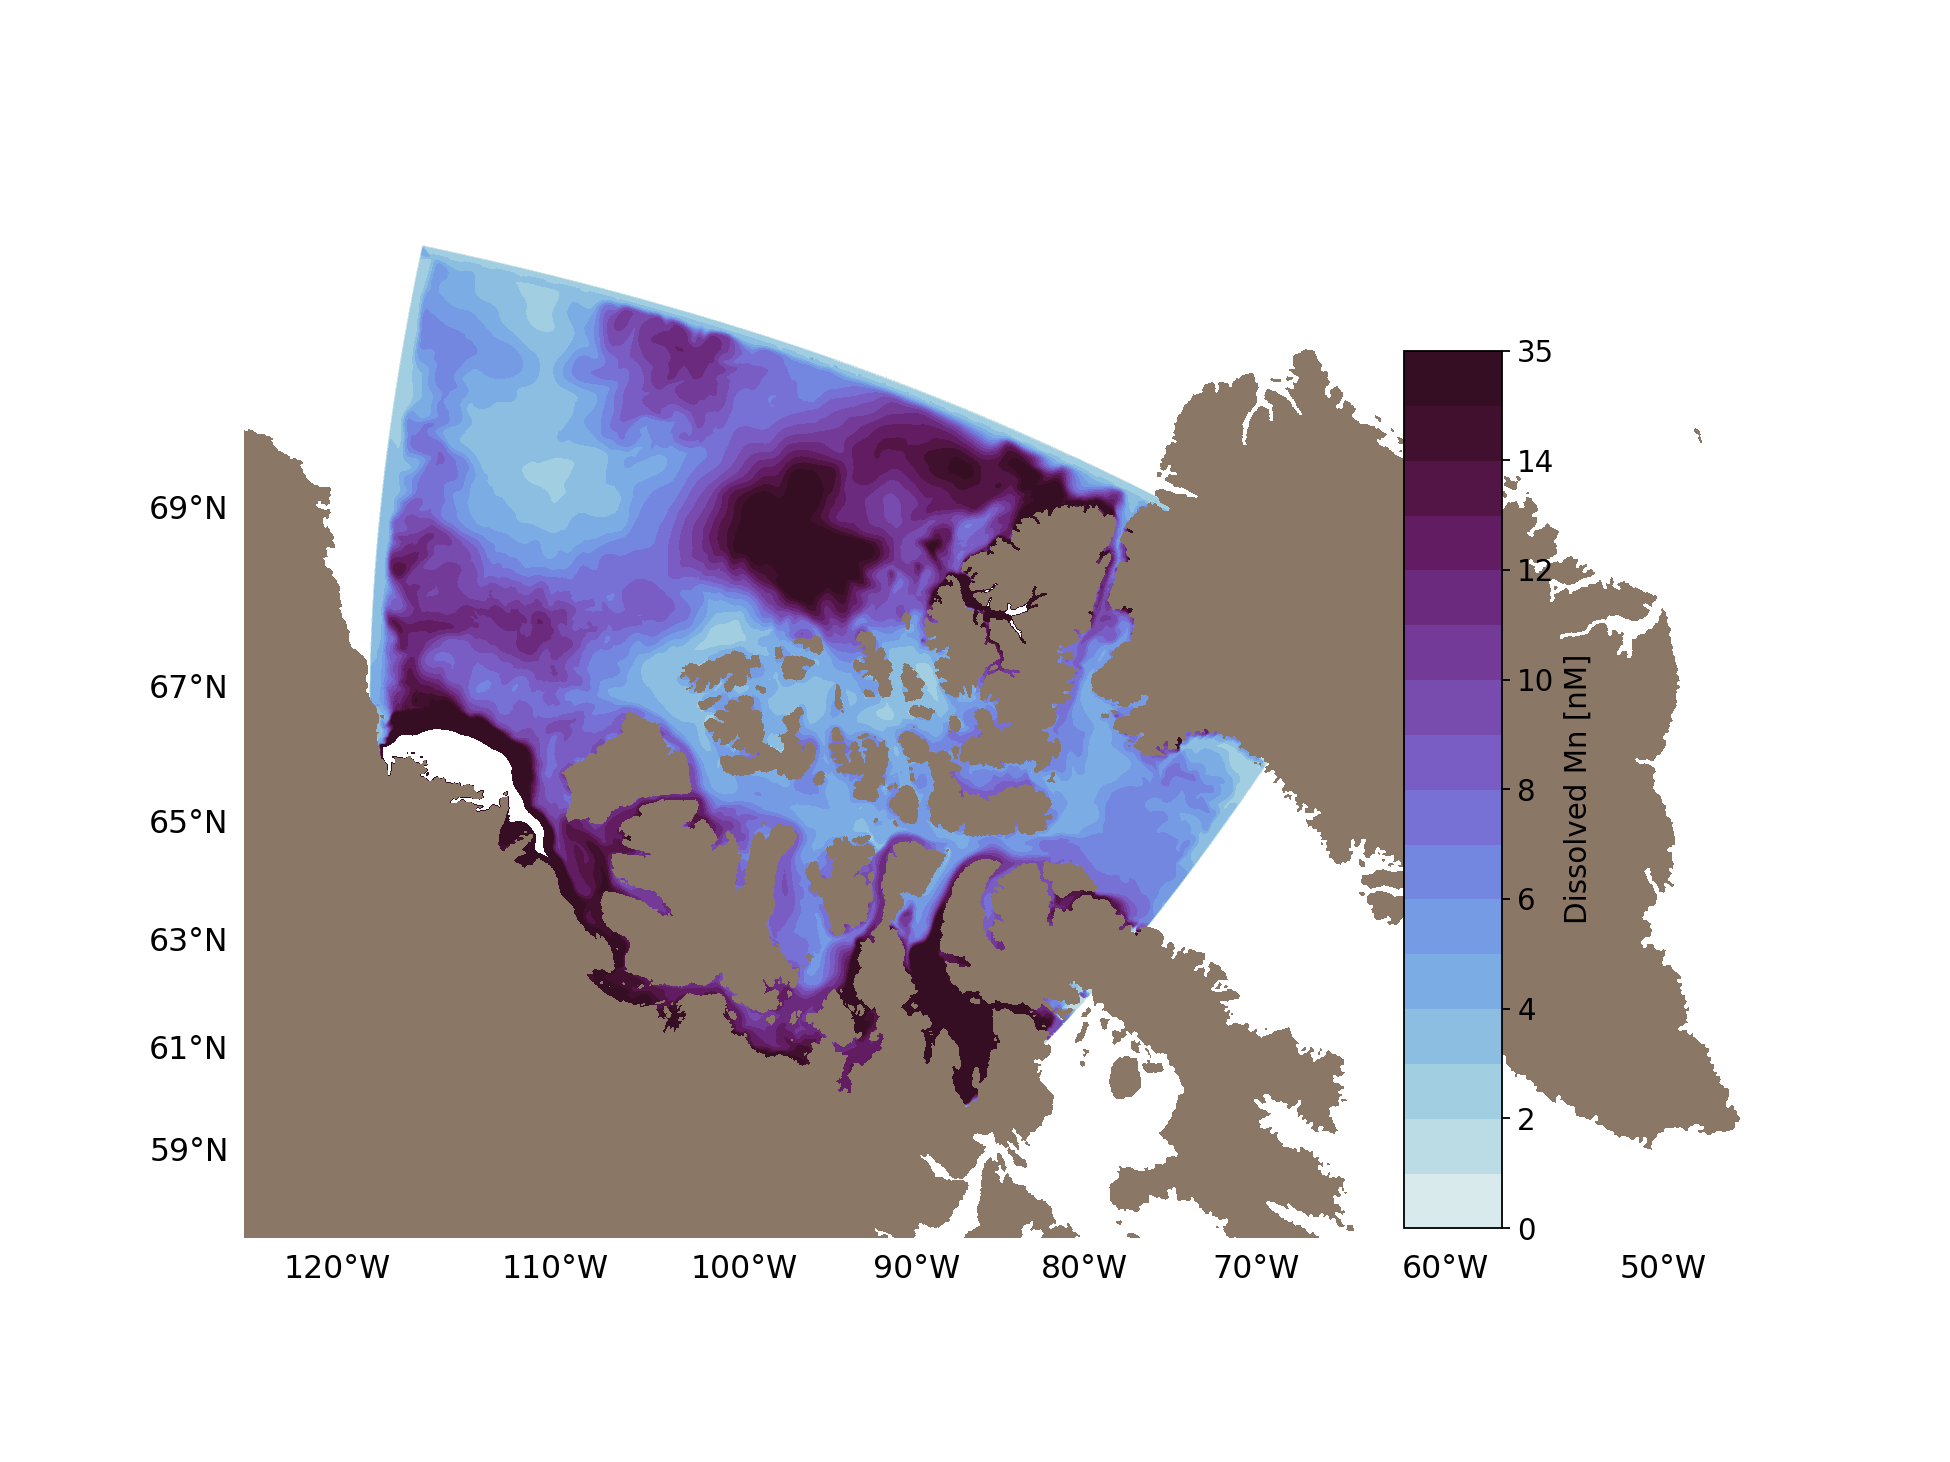

In [44]:
month=7
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


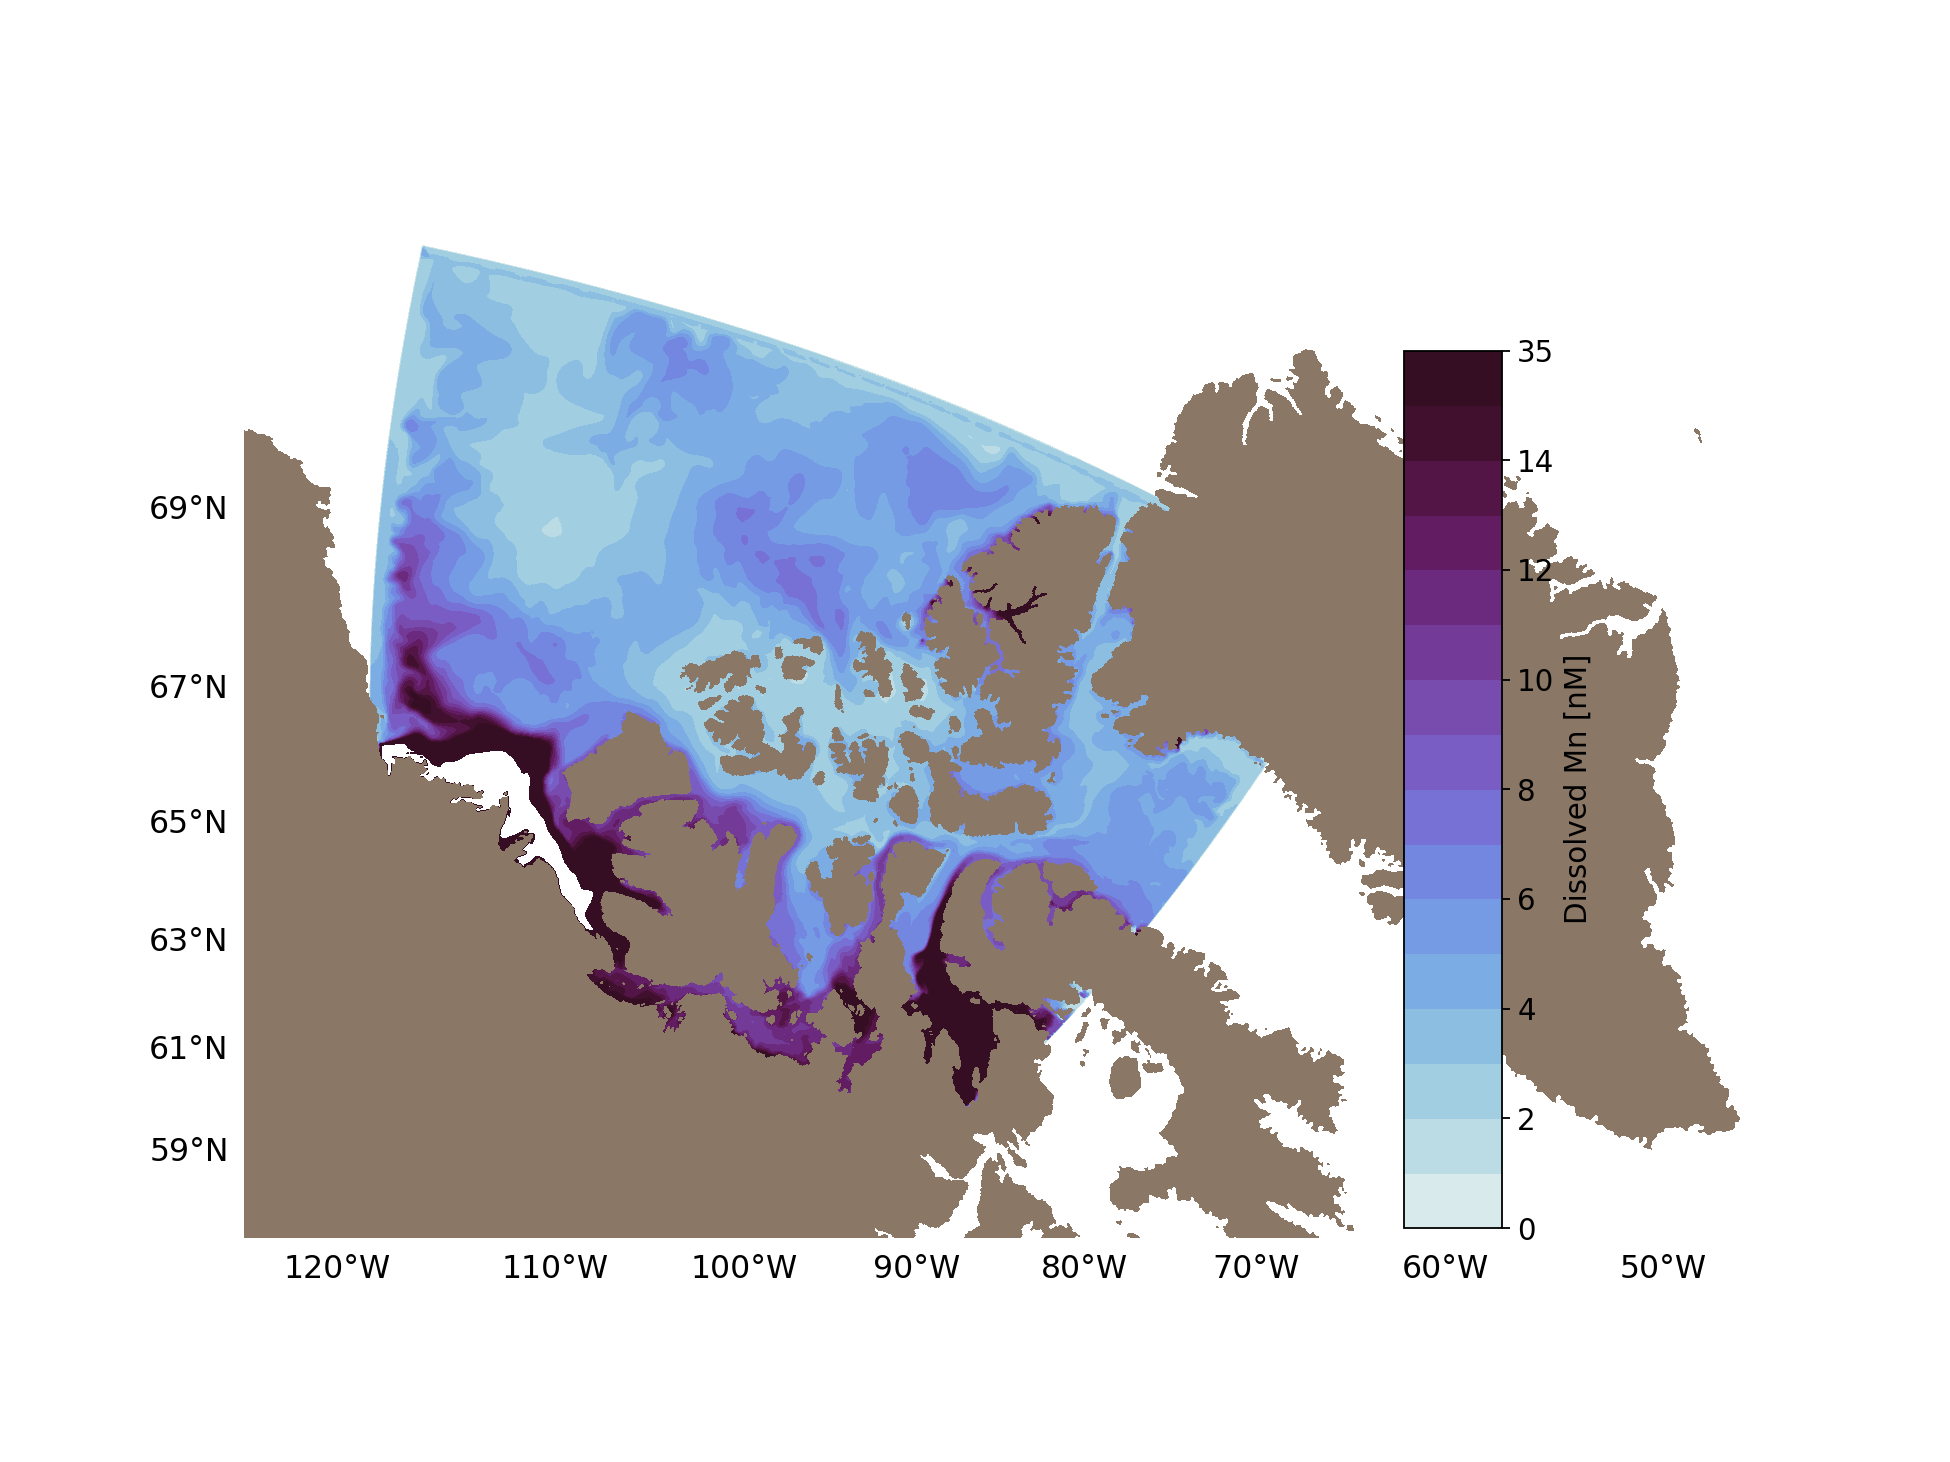

In [43]:
month=8
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


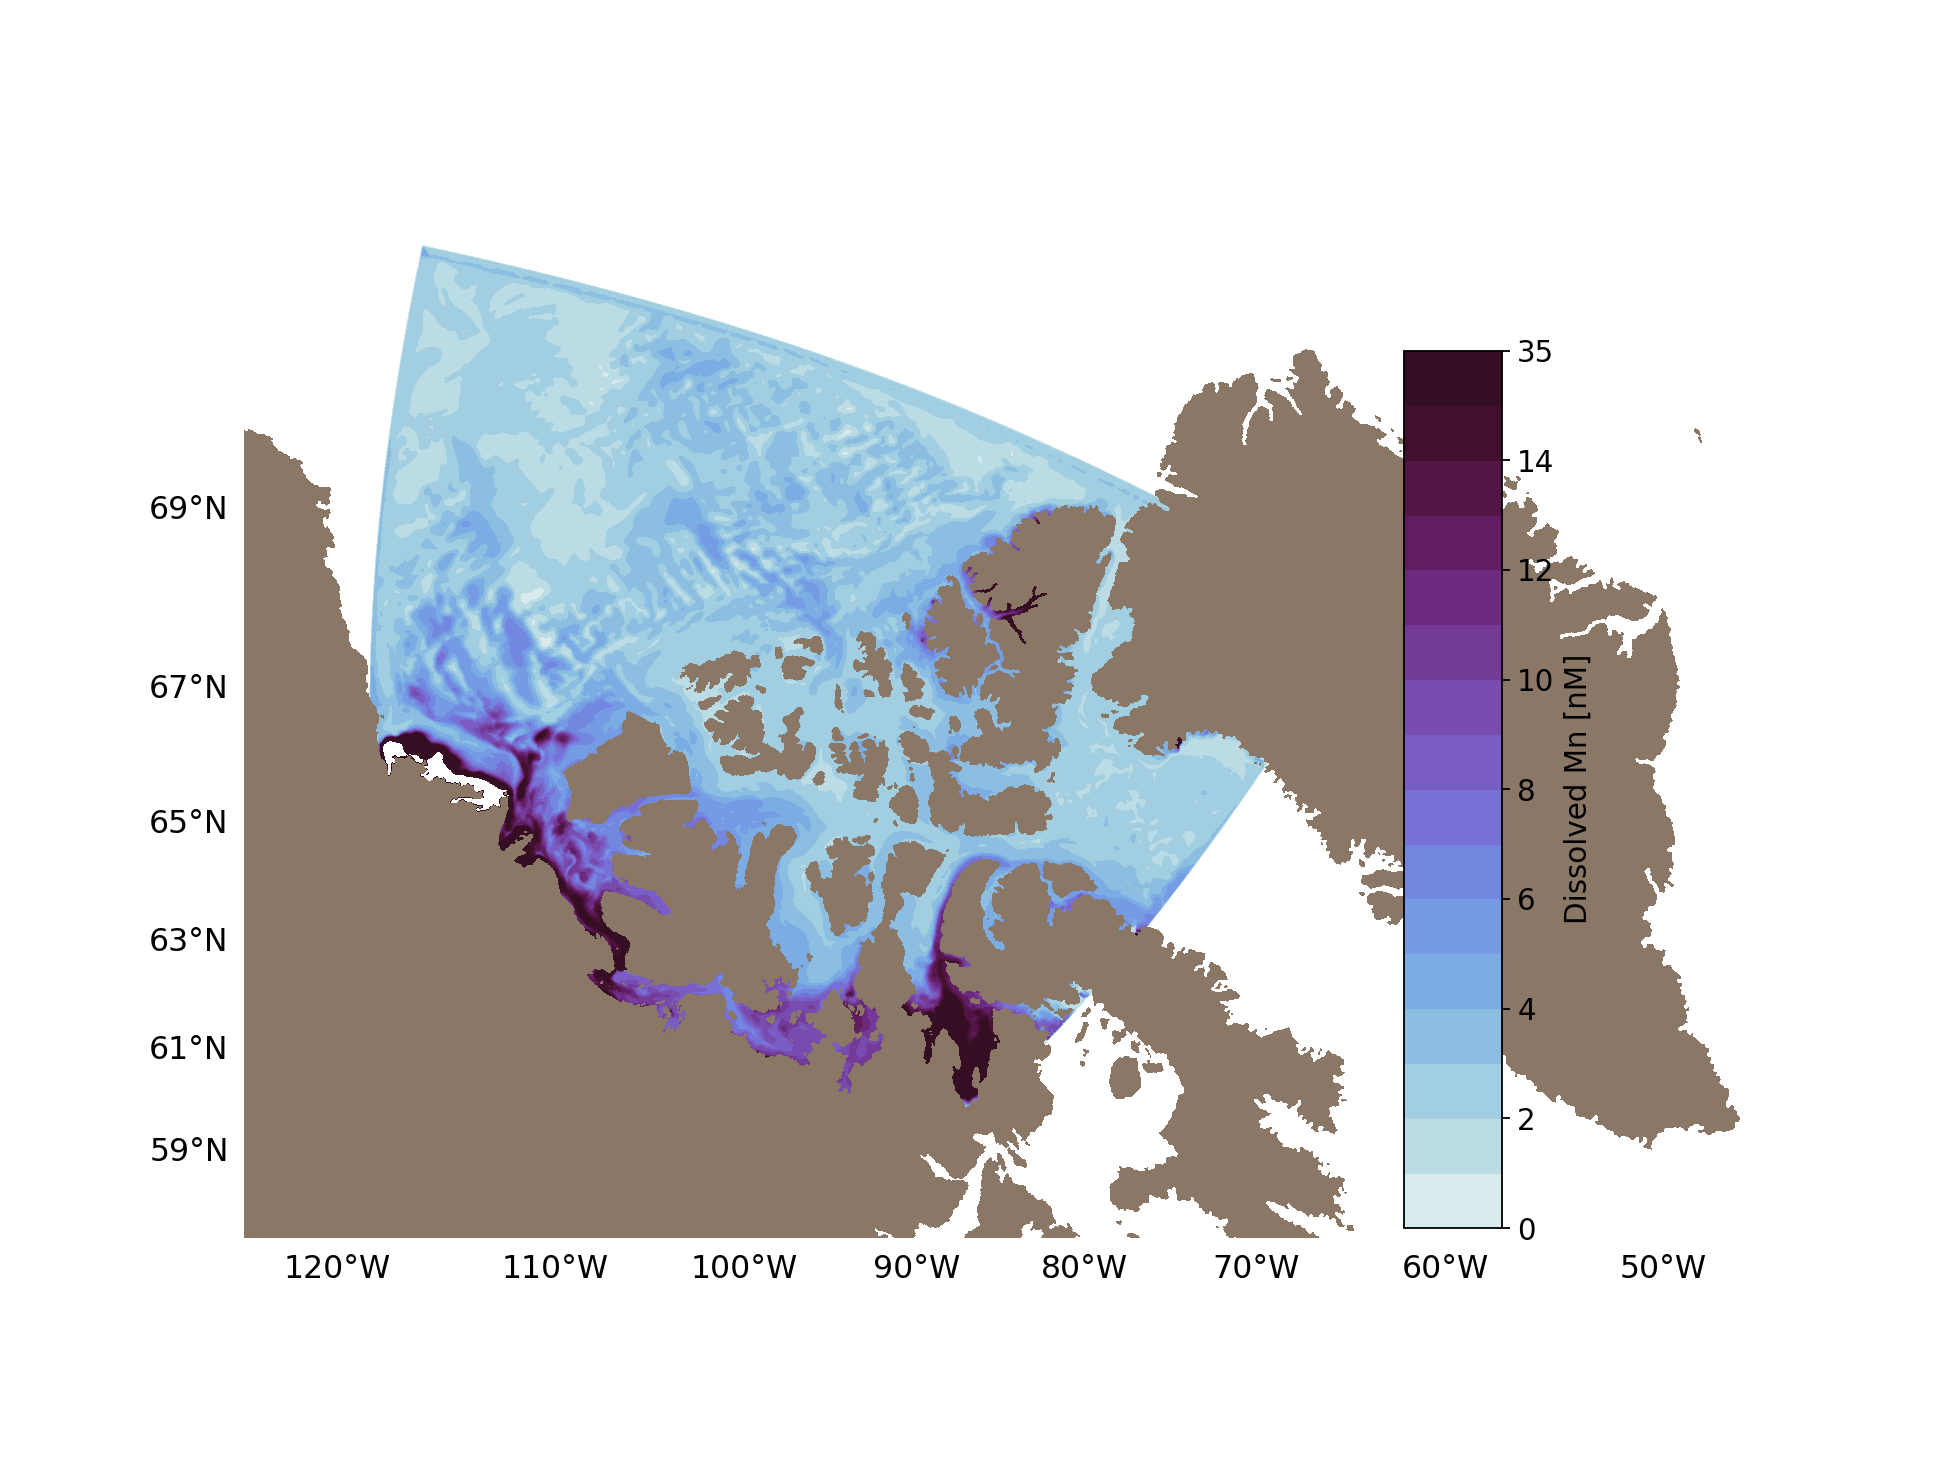

In [40]:
month=9
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


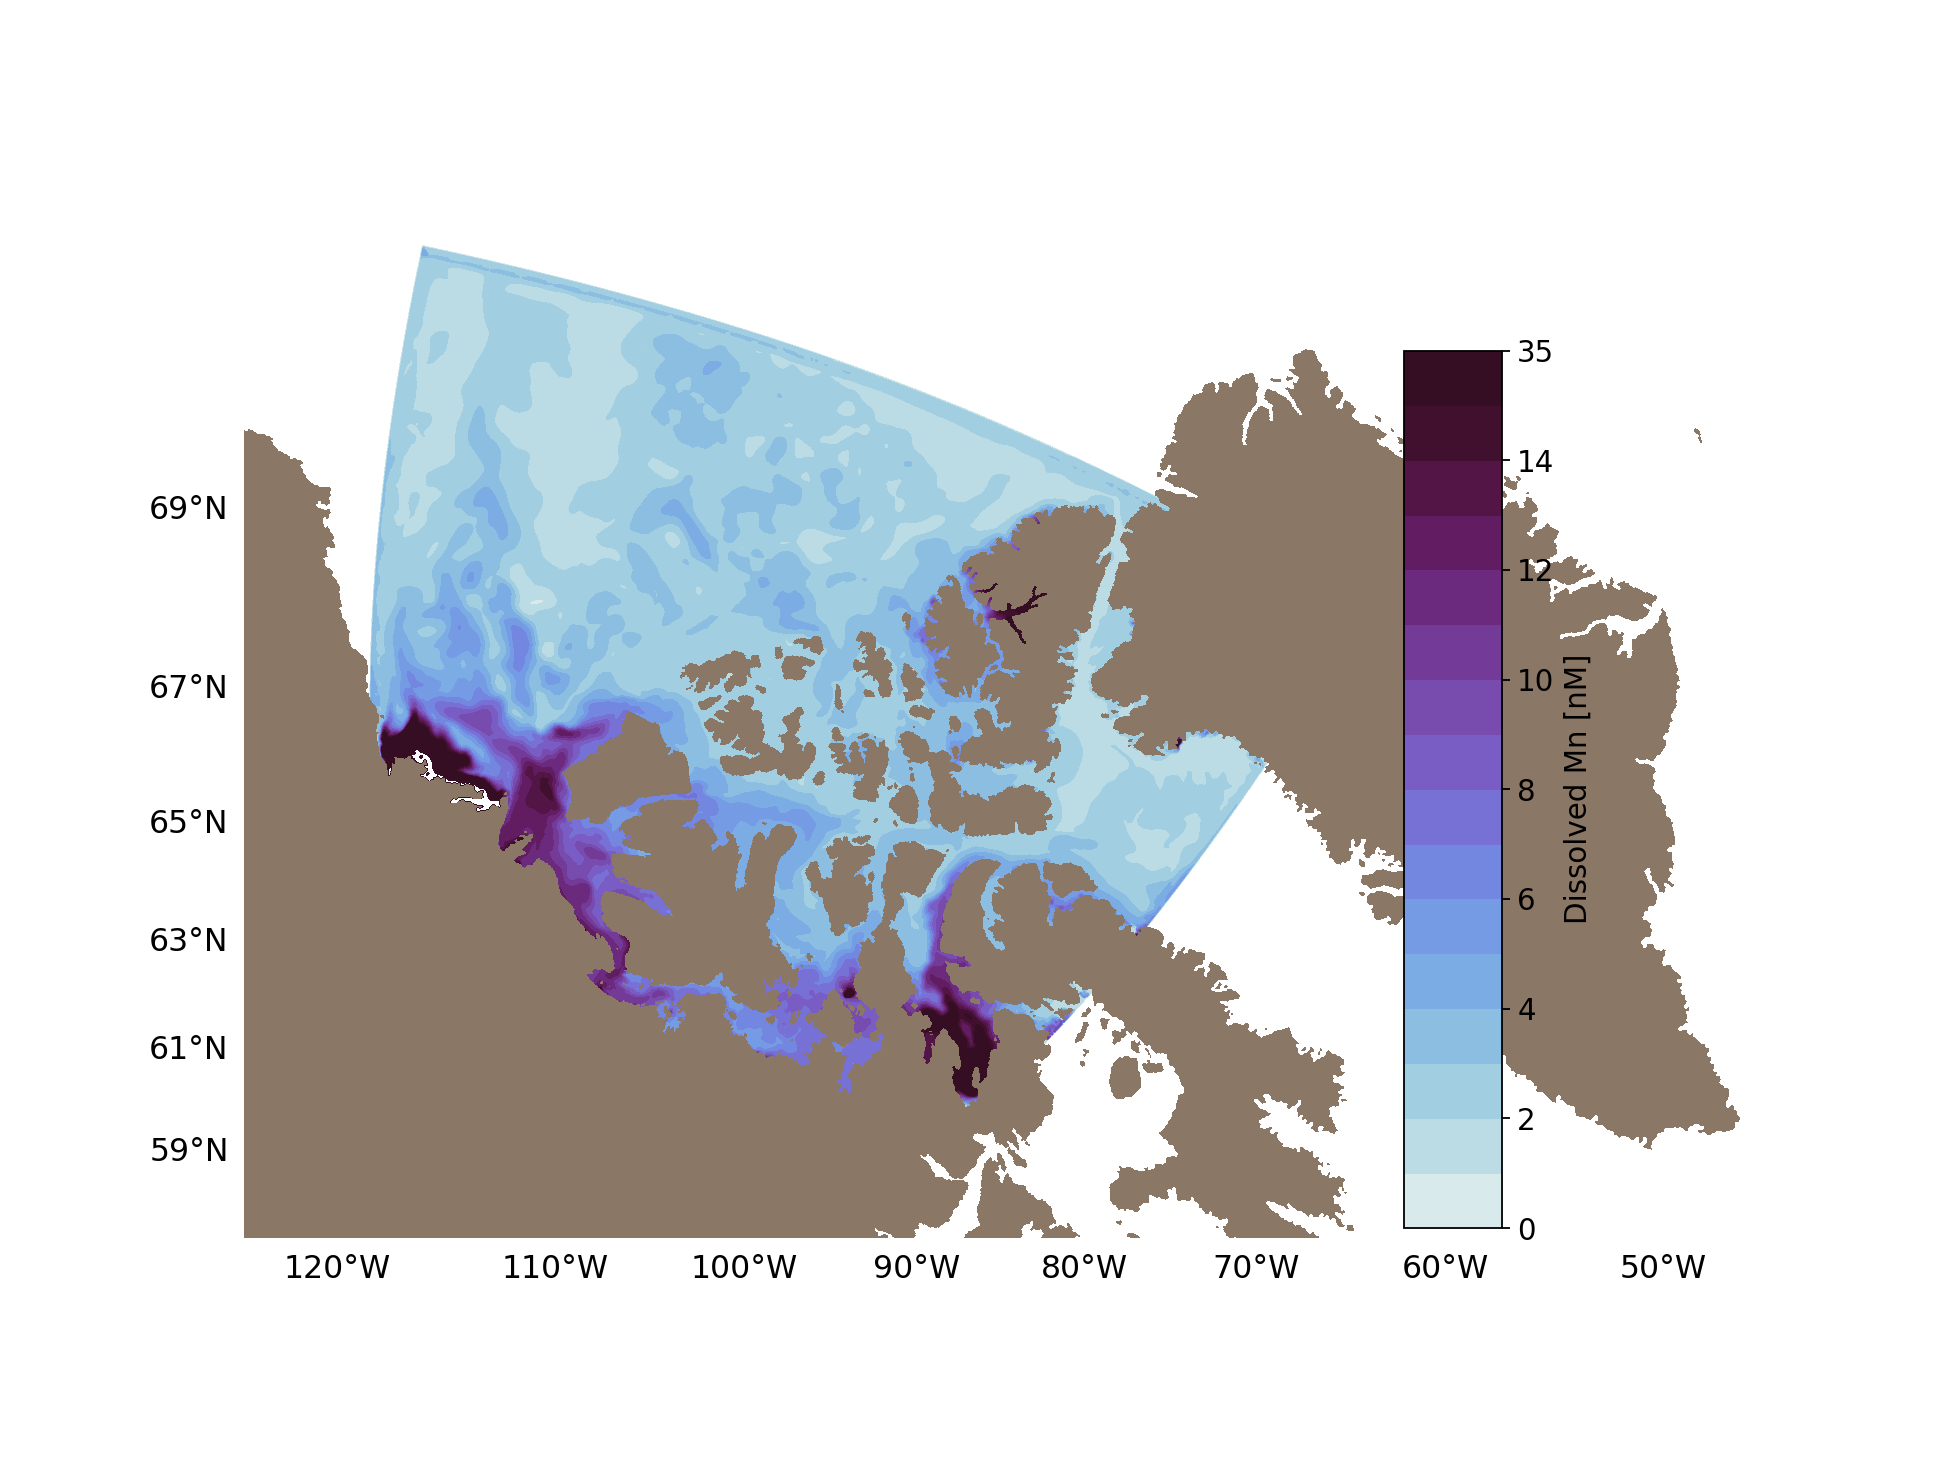

In [41]:
month=10
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


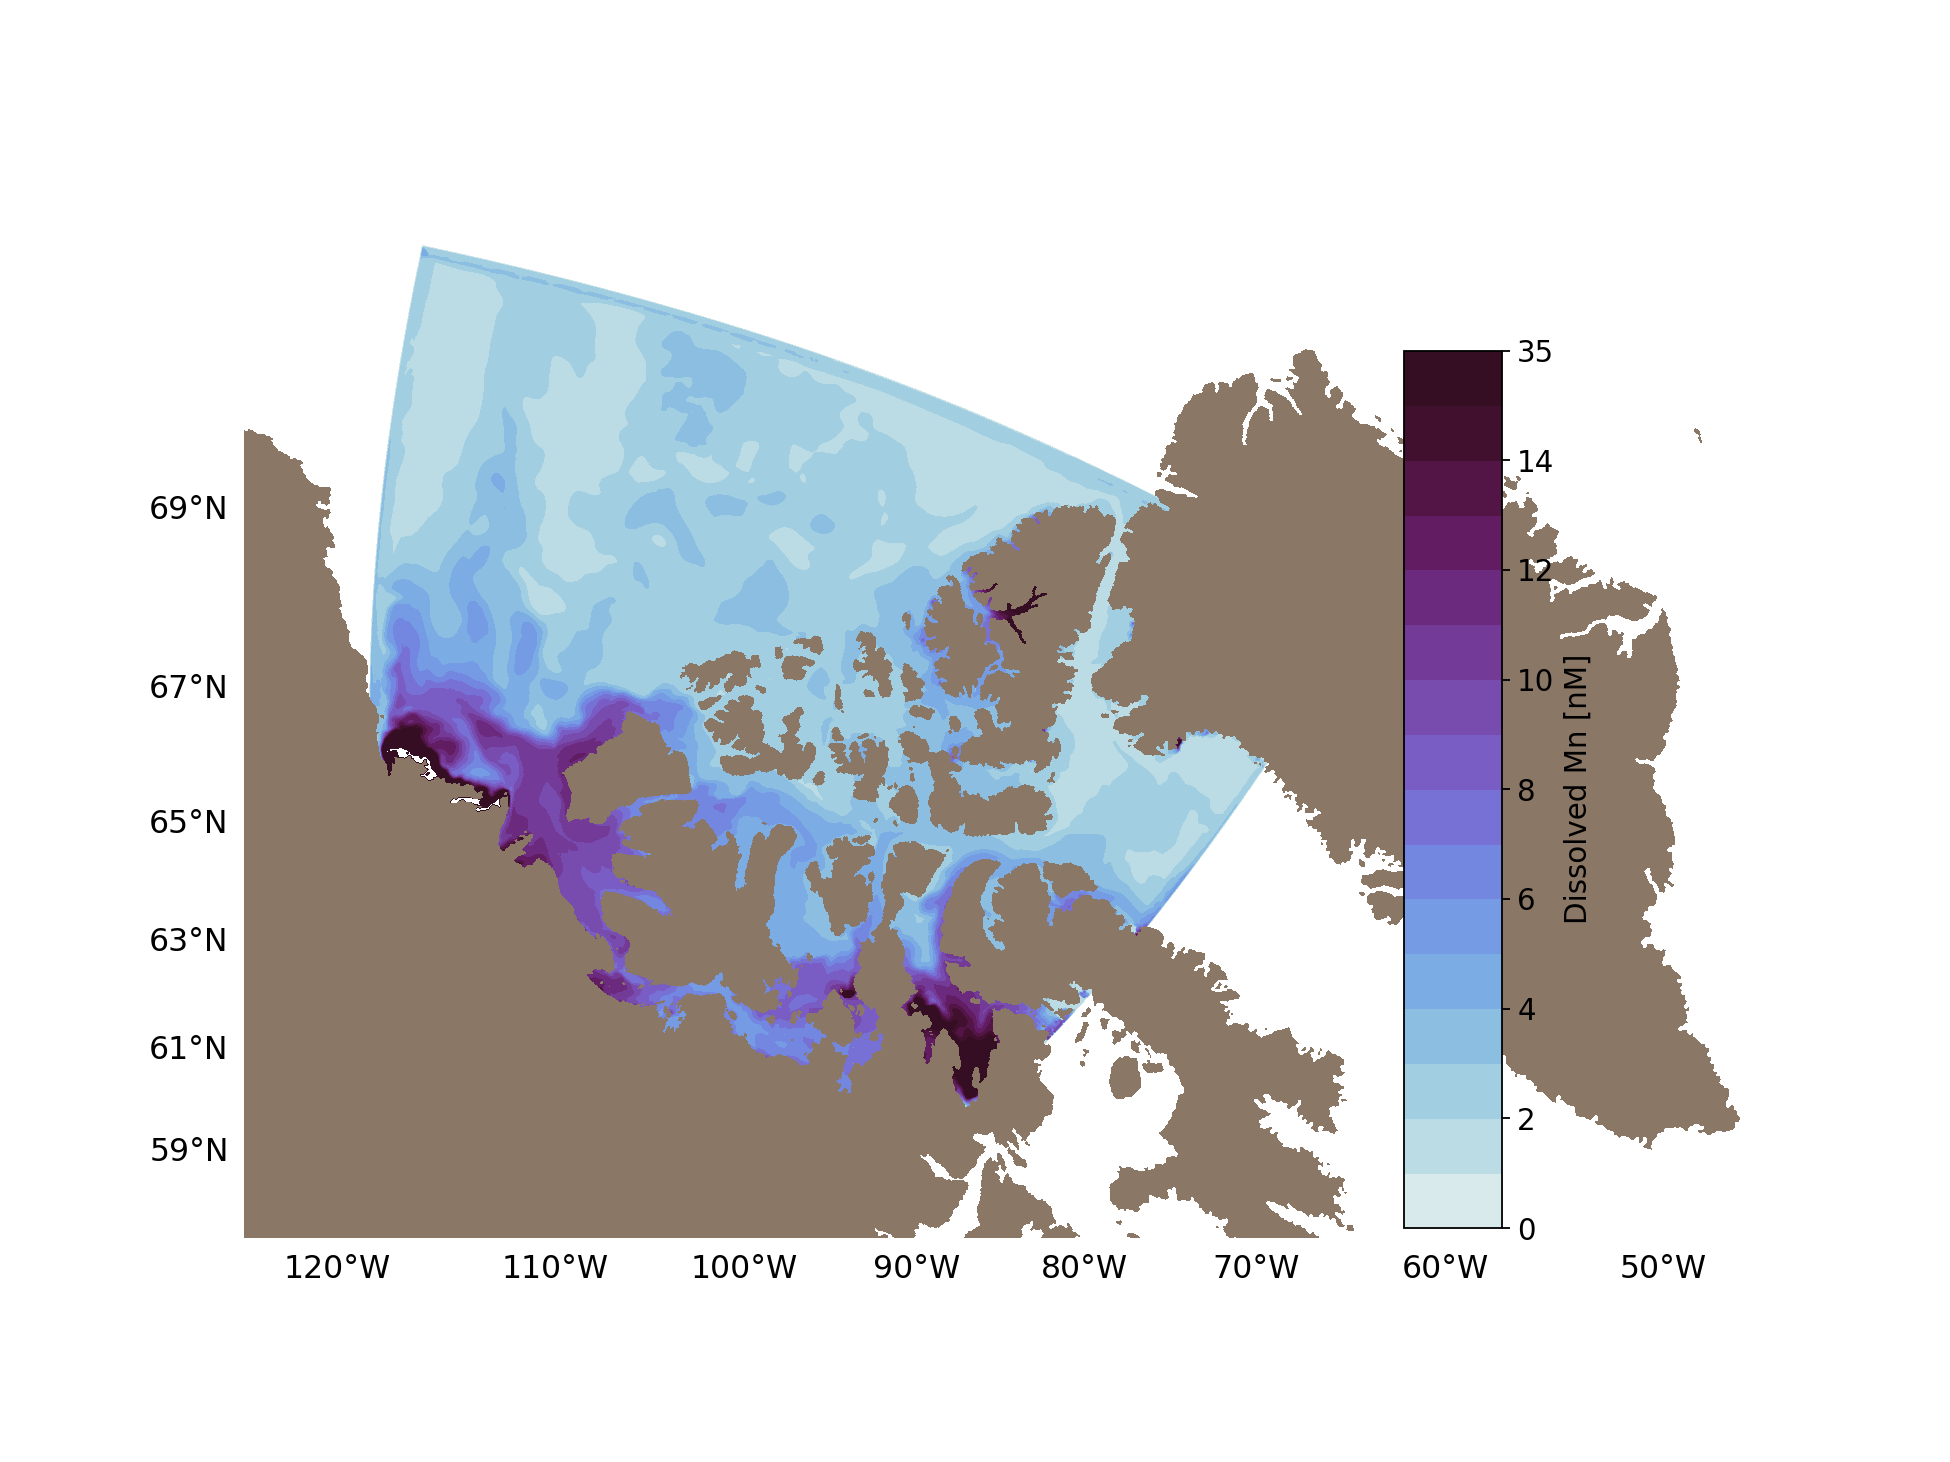

In [42]:
month=11
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

vminmn = 0 
vmaxmn = 15

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.append(np.arange(vminmn,vmaxmn+1),35),\
                         cmap=cmocean.cm.dense, vmin=vminmn, vmax=vmaxmn)

cbar_ax = fig.add_axes([0.72, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)